Mounted at /content/drive
Python 3.10.12
defaultdict(<function QLearningAgent.__init__.<locals>.<lambda> at 0x7991e64ca0e0>, {'None': [5.581842103894484, -0.10000000000000142, -0.10000000000000142, -0.10000000000000142], "[6, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[7, 0, '1111']": [1.2524750987562108, -0.10000000000000142, 1.261392043019714, 5.886469782617341], "[7, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[6, 0, '1110']": [6.219224535833269, -0.10000000000000142, 6.214924834352517, 6.2474802693149725], "[6, 1, '1111']": [8.641377377686114, 8.95911215351633, 8.909846724544266, 9.015788662205901], "[6, 1, '0011']": [5.441312080838085, 5.797510036736885, 4.830440620286634, 5.103809450321514], "[5, 0, '1110']": [6.108273021534121, -0.10000000000000142, 6.658010759580092, 6.6776739526424915], "[5, 1, '0011']": [9.841480759877854, 9.600279663411994, 9.801, 9.865278109026509], "[4, 2, '1111']": [9.78776971546217, 9.787488787274544, 9.66373442157987, 9.644446244414047], "[3, 2, '1110']": [8

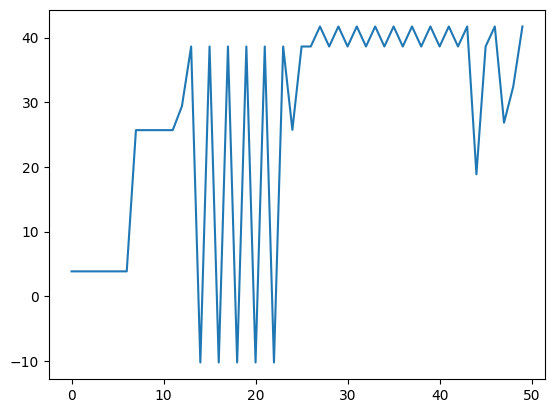

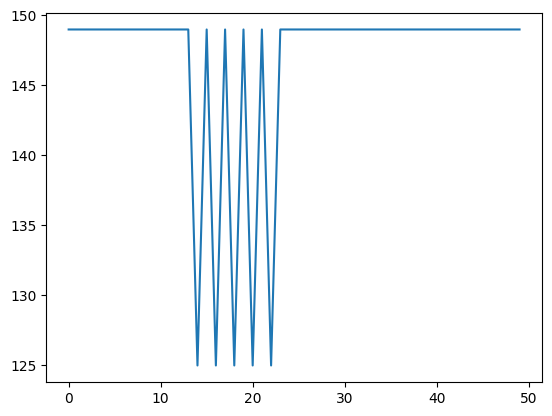

In [11]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environmenttt.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy
########################

import numpy as np
import random
import pybullet as p
from environmenttt import Env
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import math
import time

start_time = time.time()

cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory

global lr
#lr=0.1
lr=0.0001
global df
#df=0.9
df=0.9
global eps
eps=0
global number_of_steps
number_of_steps = 50

reward=0



class QLearningAgent:
    def __init__(self, actions):
        # actions = [0, 1, 2, 3]
        global lr
        global df
        global eps
        self.actions = actions
        self.learning_rate = lr #was 0.01
        self.discount_factor = df #was 0.9
        self.epsilon = eps# was 0.1
        #self.q_table = defaultdict(lambda: [10.0, 10.0, 10.0, 10.0])
        PREVIOUSQ =({'None': [5.581842103894484, -0.10000000000000142, -0.10000000000000142, -0.10000000000000142], "[6, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[7, 0, '1111']": [1.2524750987562108, -0.10000000000000142, 1.261392043019714, 5.886469782617341], "[7, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[6, 0, '1110']": [6.219224535833269, -0.10000000000000142, 6.214924834352517, 6.2474802693149725], "[6, 1, '1111']": [8.641377377686114, 8.95911215351633, 8.909846724544266, 9.015788662205901], "[6, 1, '0011']": [5.441312080838085, 5.797510036736885, 4.830440620286634, 5.103809450321514], "[5, 0, '1110']": [6.108273021534121, -0.10000000000000142, 6.658010759580092, 6.6776739526424915], "[5, 1, '0011']": [9.841480759877854, 9.600279663411994, 9.801, 9.865278109026509], "[4, 2, '1111']": [9.78776971546217, 9.787488787274544, 9.66373442157987, 9.644446244414047], "[3, 2, '1110']": [8.150891833629188, 8.105093260496195, 8.007772317856263, 7.21133032652752], "[4, 2, '1101']": [9.394282419097618, 9.309747605802995, 9.300904627900639, 9.2230880882817], "[3, 1, '1111']": [10.0, 10.0, 9.929093741592899, 9.900846128290922], "[4, 1, '1100']": [10.0, 9.915470783408693, 10.0, 10.0], "[5, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[7, 0, '1101']": [5.278818821308741, -0.10000000000000142, 6.402775494372571, 5.8756341543594965], "[4, 0, '1110']": [7.204658517216147, -0.10000000000000142, 7.1766709724188305, 7.191268006441314], "[4, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[7, 1, '0001']": [8.8, 9.632471715809201, 9.814359125763572, 9.8], "[8, 0, '1101']": [6.760976553246518, -0.10000000000000142, 6.745199223134413, 6.770394874368099], "[7, 0, '1100']": [5.099473043626804, -0.10000000000000142, 5.539745108740878, 5.641434301413494], "[8, 1, '0001']": [8.901880472205178, 8.760318169953425, 8.762565511990157, 8.816598030728475], "[6, 0, '1100']": [5.9229092634816505, -0.10000000000000142, 5.855542588956348, 6.122736860325895], "[5, 0, '1100']": [6.7562075816908465, -0.10000000000000142, 6.85597419915184, 6.849527941607342], "[3, 0, '1110']": [7.622320047216821, -0.10000000000000142, 7.608239491669716, 7.657373856241184], "[3, 1, '0011']": [8.16169891582171, 8.084839201720605, 8.063308568741995, 7.746015571468304], "[5, 1, '0010']": [9.892387284322794, 9.671097319307409, 9.9, 9.929093741592899], "[4, 1, '1110']": [9.571007768910874, 9.77092582303756, 9.729000000000001, 9.65690654845286], "[4, 1, '0010']": [8.388076119327842, 8.376088894487314, 8.209305034797524, 8.415935284043611], "[5, 1, '0000']": [7.851153652899269, 8.257889599405281, 7.8100000000000005, 8.24027108204904], "[2, 0, '1110']": [6.511418525168245, -0.10000000000000142, 8.06996921273214, 8.05078149676414], "[3, 0, '1100']": [7.441576532363918, -0.10000000000000142, 7.422500735347646, 7.442034170946311], "[7, 1, '0011']": [9.852760162797377, 9.856470960544359, 9.856555129646786, 9.471783415392412], "[7, 2, '0011']": [9.848830921262556, 9.49133791039688, 9.82946270618087, 8.984429095411608], "[7, 3, '0011']": [8.820845708173614, 9.385367731032606, 9.533680284109302, 9.40598], "[7, 4, '0011']": [8.602, 8.565288608026341, 7.707460422270063, 8.022946473822572], "[6, 4, '1110']": [10.0, 10.0, 10.0, 10.0], "[4, 1, '0011']": [7.664714102226103, 7.5424827126912595, 6.809345368760219, 7.591532493619219], "[4, 2, '0011']": [7.991391385823869, 7.981692988057139, 8.077444929706331, 8.006309724472496], "[5, 2, '1101']": [8.99491859526714, 8.916746680609338, 8.955834103879251, 8.888711349777019], "[4, 2, '0010']": [8.725676553910523, 8.694365510174723, 7.884412287805791, 8.626156882223404], "[6, 2, '0011']": [7.721214077171239, 8.248425742242624, 7.917880299999999, 7.5368210266331594], "[5, 2, '1110']": [9.40598, 9.498622364812068, 9.491290873578796, 9.48636519647275], "[5, 1, '0001']": [9.551788710791817, 9.286502757943545, 9.6059601, 9.544504560146914], "[3, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[4, 0, '1100']": [7.30888676916988, -0.10000000000000142, 7.311396543289415, 7.32070085857136], "[4, 1, '0001']": [7.241618930342831, 7.298487421711462, 6.810167745117757, 7.3021349606059935], "[3, 1, '1110']": [7.822843556221989, 7.715388549627627, 7.748422137931531, 7.746015571468304], "[4, 3, '0011']": [7.9831548687839105, 7.840963092851762, 7.767012572661695, 7.875655309736067], "[3, 3, '0010']": [8.001766810836452, 8.048671623516945, 8.055501943928974, 8.080405857608612], "[6, 3, '0011']": [10.0, 10.0, 10.0, 10.0], "[4, 1, '1111']": [9.898768847579433, 9.915470783408693, 9.877429856326353, 9.922820377573712], "[3, 2, '0011']": [8.658280302306574, 8.624769908105526, 8.697307113847037, 8.719531649179054], "[2, 2, '1110']": [8.299851723743897, 8.308812415356112, 8.284680474165604, 8.433712690950442], "[3, 2, '0001']": [9.471712890580653, 9.326367872325966, 9.323922678587802, 9.479477967530187], "[2, 1, '1110']": [8.69655539159354, 9.286655558621797, 9.205292022403436, 7.545875060099848], "[2, 2, '0011']": [9.769606191932098, 9.693053833981635, 9.734092002506507, 9.63374591825471], "[2, 3, '0011']": [9.298209393560906, 9.288101785452875, 9.1273715147045, 9.0396363817292], "[6, 2, '0001']": [7.9, 8.24878955036293, 9.1119202, 9.200418268466192], "[5, 1, '1110']": [9.523564007430934, 9.643764105462097, 9.6561, 9.621586299891801], "[6, 1, '0001']": [9.58908693352387, 9.69285946173841, 8.798168199460928, 9.681622383531908], "[5, 3, '1111']": [9.991517992610094, 9.931905686641151, 9.8, 9.954626265141725], "[5, 4, '0011']": [9.189775616229113, 9.223474298860953, 8.9, 9.123390076758712], "[3, 3, '1110']": [6.489482074704569, 6.492127787808534, 6.491316028063609, 7.130889015104137], "[2, 3, '1110']": [7.443133744811972, 7.461515764130818, 7.321373440024673, 7.5274907528322395], "[1, 3, '1110']": [7.111591469949547, 6.553062329137681, 7.215157839937578, 7.0994213816152945], "[5, 1, '1100']": [10.0, 9.696977904979923, 9.876104928936192, 10.0], "[2, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[5, 2, '0010']": [10.0, 10.0, 10.0, 9.929093741592899], "[5, 2, '0000']": [9.881472059538817, 9.9, 10.0, 10.0], "[1, 2, '1110']": [9.283807203326127, 8.812298040504897, 9.249752866929567, 9.297323347330561], "[3, 0, '1111']": [10.0, 10.0, 10.0, 10.0], "[3, 3, '0011']": [8.880280785546677, 8.817837888348748, 8.872700118496642, 8.783728175793884], "[4, 0, '1111']": [10.0, -0.10000000000000142, 9.880324539108845, 9.864286574491418], "[2, 1, '0011']": [9.37644813375004, 9.362290281406313, 9.234538221343467, 9.402999999999999], "[1, 0, '1110']": [7.743366276959305, -0.10000000000000142, 8.133302597136826, 8.050812119006274], "[1, 1, '0010']": [10.0, 10.0, 10.0, 10.0], "[4, 2, '0001']": [7.290861103470802, 7.2182987798275535, 6.88179329541381, 7.2107719144007545], "[5, 3, '1101']": [9.105295614222603, 8.9, 8.82960298802, 8.898660792430436], "[5, 2, '0001']": [9.972609449676131, 9.878927605123527, 9.966516204584073, 9.68208330947818], "[4, 4, '0011']": [8.252192504957927, 8.013346473236686, 7.906157793838585, 8.02925799209804], "[3, 4, '1110']": [7.445278381054997, 7.441160498326497, 7.42314879414719, 7.545109688008352], "[2, 4, '1110']": [7.955818584359667, 7.976583019255724, 7.875306319030163, 7.973219154591241], "[3, 2, '0010']": [7.477126557589127, 7.352062659378695, 7.193238307537473, 6.69508212871409], "[2, 0, '1100']": [7.635430326629058, -0.10000000000000142, 7.758886277162926, 7.793783780749218], "[3, 3, '0001']": [9.183589200156355, 9.205027089732786, 8.998202602533642, 9.077662781732695], "[8, 1, '1101']": [8.670552754295585, 8.760172283744271, 8.76695791173106, 8.71368446838102], "[9, 0, '1101']": [6.69110164555331, -0.10000000000000142, 6.692823130711716, 6.705501576635386], "[10, 0, '1101']": [6.653848081475659, -0.10000000000000142, 6.418759344635712, 6.3966528568236045], "[9, 0, '1100']": [5.843121617857059, -0.19000000000000128, 5.8953321614549825, 5.8602744015539505], "[10, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[4, 4, '0010']": [8.06406489845665, 8.029136235151876, 7.512389088717647, 8.003421076330774], "[5, 4, '0001']": [8.526594440623732, 8.474895684383885, 8.524260311210247, 8.530377516346915], "[3, 1, '0010']": [7.553698859199963, 7.494101282463539, 7.502560618878414, 6.667138207449991], "[4, 5, '0011']": [8.542387297731935, 8.581737494914297, 8.640883544524819, 8.583665553330208], "[4, 6, '0011']": [9.35762688701719, 9.425490938679856, 9.453054622949256, 9.450598106061484], "[4, 3, '1101']": [8.82559781602612, 8.886585940056968, 8.373442248431836, 8.66241341941534], "[3, 4, '0010']": [8.23587575615849, 8.124192887208826, 8.29816066990121, 8.322543646101515], "[5, 3, '0011']": [9.557936097184394, 8.677613246369663, 9.2119202, 9.306035026407589], "[4, 4, '1110']": [8.904267759394514, 8.948294943583749, 8.2340991249008, 8.943387415661299], "[4, 3, '0001']": [6.903100381385945, 6.75587664727685, 6.222891375022186, 6.853239837910717], "[5, 4, '1101']": [8.455612980469468, 8.570766006573205, 8.641306958139799, 8.579346827632898], "[5, 5, '0011']": [8.81140136313852, 8.615543392535715, 8.104536247931364, 8.621654035055645], "[5, 6, '0011']": [9.480004521075536, 9.467449712681862, 9.573844173614816, 9.463815844444703], "[5, 7, '0011']": [8.935489398066501, 9.270231210926433, 9.403419011083423, 9.391967837161364], "[4, 6, '1110']": [8.127842520494573, 8.355376008100396, 8.091551138725192, 8.18159622682379], "[1, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[4, 3, '0010']": [8.656679689241745, 8.696174406244829, 7.765632209674443, 8.567558760060601], "[3, 5, '0011']": [8.721649421687292, 8.71721815468651, 8.92006504103048, 8.69874937770238], "[4, 4, '0000']": [7.273679104367556, 7.3822034727531864, 6.746656182306269, 7.336829562983242], "[4, 0, '1101']": [9.9, -0.10000000000000142, 10.0, 10.0], "[4, 1, '0000']": [8.70882786307769, 8.739085674264523, 8.794542931152986, 8.863022423317696], "[3, 1, '0000']": [7.558204148540444, 7.521075642331053, 7.598832778289623, 6.567887093974793], "[2, 2, '0010']": [8.712240343912624, 8.750218221303149, 8.799484318353553, 8.783335961396203], "[3, 2, '1100']": [8.181159284494807, 8.183008534302354, 8.097108981063453, 8.239525607020951], "[5, 3, '0001']": [8.897382149739698, 8.897431000346351, 8.702, 8.84171876035473], "[4, 5, '0010']": [8.043673884779333, 7.836008072444098, 7.820863911314855, 7.833823154801008], "[3, 5, '1110']": [7.653596768490608, 7.673054887406391, 7.5946874964001925, 7.662822328337716], "[2, 5, '1110']": [8.247835833333182, 8.297632580366773, 8.121748106258668, 8.245822201478099], "[2, 6, '0011']": [8.996047156859433, 9.052537723663836, 9.001376424404258, 8.913434569182495], "[3, 6, '0001']": [8.621243761375991, 8.691610344441653, 8.931400119144854, 8.703395577162206], "[3, 7, '0011']": [8.922820377573712, 9.010713922738542, 8.9554573845852, 9.002990999458437], "[3, 8, '0011']": [8.3119202, 8.678221430849247, 7.817844039716757, 8.727955222666903], "[3, 4, '0011']": [8.84486013013358, 8.982942995614554, 9.06907124426664, 8.88973618338283], "[2, 4, '0010']": [7.941251058142785, 7.904831813101753, 7.917276984975869, 8.013651754986167], "[2, 3, '0010']": [8.489375444850474, 7.579635351932331, 8.522043875551647, 8.44193984553972], "[0, 0, '1110']": [7.67816512525798, -0.10000000000000142, 7.699604502261862, -0.10000000000000142], "[0, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[4, 4, '0001']": [7.349797912140573, 7.156446021217834, 7.12215259689654, 7.070062680394015], "[3, 2, '0000']": [7.406904364780474, 7.400413216797325, 7.377259761865009, 7.62000512843344], "[3, 5, '0001']": [7.909946741699061, 7.710150949732276, 7.707134401153427, 7.656668728733951], "[3, 6, '0011']": [9.244159961197303, 9.219982346255653, 9.30364868730033, 9.248283777846499], "[2, 6, '0010']": [8.136530461930553, 8.1305414487542, 7.9836691653882585, 8.12365731871863], "[1, 6, '1110']": [8.370713060594142, 8.368656549697056, 8.226798765969352, 8.314134414003522], "[1, 5, '1110']": [8.13634334277171, 8.221938405288743, 8.18962823949079, 8.167435781077888], "[5, 5, '1101']": [8.131546592338895, 7.343961148051833, 8.278196015112222, 8.006068799285332], "[4, 3, '0000']": [7.941132604097695, 8.0370775661465, 7.236587468445196, 8.01100277712426], "[4, 4, '1101']": [9.360738694382897, 9.22617196068199, 9.388419014780409, 9.141406678972196], "[5, 5, '0001']": [7.11667380548664, 6.699275294240293, 6.661087539054025, 7.156894681474381], "[4, 4, '1100']": [9.074662958275223, 9.123319666546603, 8.48550476427189, 9.092696565769888], "[3, 4, '0000']": [6.87193782119713, 6.8028235410903815, 6.929595678109331, 6.8755492339958355], "[3, 5, '0010']": [7.601293337451481, 7.392449331043414, 7.4161120919498345, 7.424266537999058], "[4, 5, '0001']": [8.423940873135875, 8.355770923191645, 7.501512855080797, 8.291155964168755], "[3, 6, '0010']": [7.566738913469387, 7.56992158058951, 7.581499835522942, 7.654139724268116], "[6, 5, '1101']": [8.539530469188032, 7.811, 7.4386510999999995, 8.374691858217394], "[5, 5, '0000']": [7.946940291154764, 7.733420843460715, 7.3904023362405376, 7.83579640546832], "[2, 1, '0010']": [8.956334279687383, 9.008834256493547, 8.82451325841646, 8.09868312127266], "[1, 0, '1100']": [6.885424724841935, -0.10000000000000142, 7.831713373644591, 7.771844007183583], "[6, 6, '0011']": [9.474930040744281, 9.459984338302597, 9.863257925097225, 9.488020010094964], "[6, 7, '0011']": [7.89289385108032, 8.765503764935232, 8.759846408998323, 8.77509129982287], "[1, 1, '1111']": [9.9, 10.0, 9.8, 10.0], "[1, 2, '0010']": [10.0, 10.0, 10.0, 9.91356853547309], "[0, 2, '1110']": [7.926134435959692, 8.014971003938717, 8.00719248155505, -0.10000000000000142], "[0, 1, '1110']": [9.36535547334499, 9.365498689085971, 8.8, -0.10000000000000142], "[1, 1, '1101']": [8.8, 9.53961147271359, 8.477215476234598, 9.454391996895986], "[5, 6, '0010']": [8.159021214813272, 8.159940504643988, 8.226426155113254, 8.200980583981403], "[3, 3, '1100']": [5.281819774276147, 5.283948103826151, 5.999782639860937, 5.265425644505171], "[4, 6, '1101']": [9.726262372463177, 9.698244988375174, 9.726391196610015, 9.463024028014786], "[5, 6, '1101']": [9.604451662756407, 9.61257280993112, 9.611742604955879, 9.566395522097213], "[4, 7, '0010']": [7.816384513893796, 7.950863499929758, 7.838622559130352, 7.955477709640884], "[4, 8, '0011']": [8.9, 8.816135901304632, 8.877429856326353, 8.853358717390055], "[2, 5, '0011']": [9.369540788482743, 9.240332556441205, 9.234342370994256, 9.40766118814491], "[1, 4, '1110']": [7.840912581522513, 7.807455450642216, 7.862793803025217, 7.8081359003049045], "[2, 4, '1100']": [8.178567908035639, 8.22982037474183, 8.116466238850842, 8.26476285779681], "[3, 1, '0001']": [9.713808376731908, 9.559127386770747, 9.574688371329545, 9.7], "[3, 4, '1100']": [7.352729227124168, 7.406076992737032, 7.398394232421818, 7.439583927517905], "[2, 4, '0011']": [8.749384380222285, 8.858371737653773, 8.720791524492315, 8.724172252397967], "[2, 3, '0001']": [9.204398539558568, 8.403879772804261, 9.195053947505683, 9.115920398235765], "[1, 4, '0010']": [7.7481165018643665, 7.727705067825855, 7.651854518995545, 7.7066629721764075], "[0, 3, '1110']": [7.078287835391633, 7.091198060924795, 7.08986419986693, -0.10000000000000142], "[-1, 3, '0000']": [10.0, 10.0, 10.0, 10.0], "[3, 4, '0001']": [8.321487828783784, 8.18717026330107, 8.44815874186338, 8.212945948429521], "[6, 6, '1101']": [9.24146514439964, 8.980137951934339, 9.653285002724576, 9.228825972172011], "[7, 6, '1101']": [9.061255163180633, 8.890127432710175, 9.652456693946338, 9.042224735662698], "[4, 7, '0011']": [8.929093741592899, 9.276039056273063, 9.31054529324362, 9.222415115749145], "[4, 5, '1101']": [9.49774384623012, 9.55759748109116, 9.577316744379607, 9.589480608921061], "[7, 7, '0011']": [7.979885554417514, 8.756825943544532, 8.753134883634116, 8.768041465597651], "[2, 2, '1100']": [9.42392173700182, 9.60734003918693, 9.55661426610316, 8.801], "[0, 3, '0011']": [9.186678145244834, 9.125695337477145, 9.135023301204699, -0.10000000000000142], "[-1, 2, '0000']": [10.0, 10.0, 10.0, 10.0], "[6, 6, '0010']": [8.609598716233412, 7.800167607333065, 8.432732935327031, 8.736617187622565], "[0, 1, '0011']": [7.875277554646522, 7.897450581302959, 7.715031564507138, -0.10000000000000142], "[-1, 1, '0000']": [10.0, 10.0, 10.0, 10.0], "[1, 2, '1111']": [8.492950712170199, 8.512865657160997, 8.530972050750504, 8.532497699291682], "[2, 2, '1101']": [9.086577777637846, 8.815094210109207, 9.018086869551178, 8.98693856830778], "[1, 3, '0010']": [9.195095305798857, 9.320635857600163, 9.352926194030427, 9.28378723106422], "[2, 3, '0000']": [7.782372891415795, 7.629483206279762, 7.721890008778379, 7.768171029106313], "[0, 4, '1110']": [7.479380358956089, 7.504384496982752, 7.692870044025525, -0.10000000000000142], "[-1, 4, '0000']": [10.0, 10.0, 10.0, 10.0], "[1, 5, '0011']": [8.63719222085998, 8.691462450659145, 8.63319185697612, 8.562910186560247], "[0, 5, '1110']": [7.7639194728670216, 7.821538351102672, 7.755980496249239, -0.10000000000000142], "[1, 5, '0001']": [9.27331881873609, 9.378454279770724, 9.363011046952003, 9.372729512985291], "[6, 6, '1100']": [7.319081538475046, 6.325868741409314, 7.549834874761952, 7.275135123439172], "[3, 2, '1101']": [9.872064446161978, 9.694037556162748, 9.713570697968422, 9.866356043212154], "[7, 8, '0011']": [8.82960298802, 8.708581696952365, 8.9, 8.94142095013386], "[2, 2, '1111']": [8.745710829304535, 7.904392982119682, 8.675960212546183, 8.038401581692185], "[5, 4, '1111']": [9.9, 8.874786800750748, 9.8, 9.864382104677318], "[2, 7, '0011']": [7.910858270202427, 8.623846390551282, 8.731985798053364, 8.624081801379361], "[3, 7, '1101']": [8.922820377573712, 9.600964158970555, 9.666111470084683, 9.63182228324147], "[6, 7, '0010']": [6.984060688451403, 7.5451095361707265, 7.594715304921579, 7.628417272078175], "[8, 6, '1101']": [10.0, 10.0, 10.412166086704135, 9.712212457686352], "[7, 6, '1100']": [7.791244115085375, 9.317335835007464, 7.745690201989248, 7.758057342510031], "[3, 3, '0000']": [6.89004178875672, 6.9893061527666775, 6.914385152956909, 6.923323908210319], "[4, 6, '0001']": [9.452491766778575, 9.477972235088, 9.477664852661784, 9.439129444002509], "[4, 6, '0000']": [7.224731060812151, 7.171120917800637, 7.171882647544307, 7.179820714235738], "[6, 5, '1111']": [9.6892011713998, 8.9, 9.8, 9.823880706456595], "[6, 6, '0001']": [9.571911115814867, 9.640189807597105, 9.795224766802512, 9.572655757924615], "[5, 5, '1100']": [8.923892850056264, 8.727042363679447, 8.900393946651278, 8.948799893529014], "[6, 7, '0001']": [8.94142095013386, 9.081839440650924, 9.309648305814074, 9.32737390306794], "[6, 8, '0011']": [7.62389, 8.247221016221145, 8.3386511, 7.977429856326353], "[2, 5, '0010']": [8.01105473426457, 7.949621048349778, 8.037012187901768, 8.020995474973677], "[1, 6, '0011']": [8.586549351750822, 8.62893367108207, 8.513959285484313, 8.592525435326754], "[0, 6, '1110']": [8.088965890126154, 8.295820294201457, 8.057672788846181, -0.10000000000000142], "[0, 7, '0011']": [7.909160672568361, 8.693945468067643, 8.89932488116851, -0.10000000000000142], "[0, 8, '0011']": [9.8, 9.610804068151738, 9.643366276959306, -0.10000000000000142], "[4, 5, '1110']": [9.011889592866742, 8.953940243162354, 8.387901494589697, 8.896084722483778], "[5, 6, '0001']": [9.578093856306381, 9.505313815054807, 9.632204700773926, 9.48887265856003], "[3, 6, '1110']": [7.775178429715579, 7.826586200583578, 7.82429186565329, 7.837839125827464], "[2, 7, '1110']": [7.925440326330419, 8.394077668204618, 8.239778422313446, 8.432998746210401], "[2, 6, '1110']": [8.299555550212656, 8.266010079759498, 8.289307511486314, 8.266793074996926], "[2, 5, '1111']": [9.427970809308542, 9.381144455910778, 9.430465789915356, 9.302048025197898], "[3, 5, '1101']": [8.938148506156773, 8.996840227926853, 8.924596012064375, 8.820569730610707], "[2, 6, '0001']": [9.342724996399273, 9.321723837725736, 9.369132864726947, 9.354275682434103], "[3, 6, '1101']": [9.436760449278779, 9.476597089362487, 9.538473285378975, 9.529692994526457], "[0, 5, '0011']": [9.119251992168055, 9.317814671229582, 9.088075055974022, -0.10000000000000142], "[2, 5, '0001']": [9.108504642390544, 9.086014874946203, 9.068801188952017, 8.950589444811728], "[-1, 0, '0000']": [10.0, 10.0, 10.0, 10.0], "[4, 6, '0010']": [8.081956404424446, 8.096956741979184, 8.014553604432821, 8.06643407719176], "[5, 7, '0001']": [8.935489398066501, 9.154115249380299, 9.391927074310722, 9.27088052392482], "[6, 7, '1101']": [8.94142095013386, 9.687736158173173, 9.681328029195367, 9.688863629954884], "[5, 8, '1110']": [10.0, 10.0, 10.0, 8.929093741592899], "[5, 7, '1110']": [8.851329856326352, 9.089518102260428, 8.90143973344555, 8.856952204587301], "[4, 7, '1110']": [7.812706919179756, 8.125898174848395, 8.095356587123817, 8.132749951721264], "[5, 7, '1100']": [8.918389398066502, 9.654420050743424, 9.376924827200934, 9.575568585730478], "[5, 8, '0011']": [8.119800998, 8.68572372181811, 8.798699805254335, 8.847278109026508], "[6, 8, '1101']": [10.0, 9.966516204584073, 8.9, 10.0], "[7, 7, '0001']": [8.946255554956586, 9.181066825201398, 9.129791881957628, 9.160333312831785], "[7, 8, '0001']": [10.0, 10.0, 10.0, 10.0], "[5, 7, '0010']": [6.870790375923775, 7.720753575056945, 7.755510814593302, 7.764999417102967], "[6, 7, '0000']": [6.999855487376326, 7.07629414906586, 7.048813530797847, 7.0642048669181365], "[5, 7, '0000']": [6.9181493107056395, 7.205501125383831, 7.1756446615376355, 7.250916283777641], "[4, 8, '0010']": [9.8, 9.707145182010919, 8.9, 9.642820377573713], "[7, 7, '1101']": [8.946255554956586, 9.708170928141696, 9.493234877815087, 9.47818134221677], "[6, 8, '0010']": [10.0, 9.655376577069557, 9.8, 10.0], "[1, 4, '0011']": [9.223434544524238, 9.324494741643406, 9.284264743861565, 9.155543118790089], "[1, 2, '0011']": [9.9, 9.8, 10.0, 10.0], "[1, 3, '0000']": [7.452191904687663, 6.5046057819550285, 7.432890185212778, 7.438522546848793], "[0, 4, '0010']": [7.464228589859876, 7.3487831818566836, 7.2764575646928185, -0.10000000000000142], "[1, 4, '0001']": [9.02016790155477, 9.172412823662466, 9.1137707889771, 9.100554091033148], "[2, 3, '1100']": [6.969260792822422, 7.005654600243675, 6.977667708258295, 7.0397110797129745], "[0, 4, '1111']": [9.079951544498075, 9.115545863260744, 9.184147850407458, -0.10000000000000142], "[9, 6, '1101']": [9.981138383277425, 10.0, 10.359034897437606, 9.9], "[2, 8, '0011']": [9.602, 9.304696419060853, 9.505999816293787, 9.56476735115639], "[4, 5, '0000']": [7.008773799140087, 7.037352792355951, 6.346637737744882, 7.051166981004383], "[3, 8, '1110']": [10.0, 9.936646308171913, 9.8, 8.917126487542326], "[3, 7, '1110']": [7.878442249550167, 8.009023730346756, 7.981433024994463, 8.005183283006637], "[4, 7, '0001']": [8.9200937415929, 9.277007844521245, 9.364651701573171, 9.35838622207332], "[8, 7, '1101']": [8.949423123090202, 10.204026505687416, 10.0, 10.0], "[8, 8, '0011']": [8.9, 9.323977014954785, 9.324529607775075, 8.708885554417513], "[7, 8, '0010']": [9.8, 9.9, 8.9, 9.84142095013386], "[7, 7, '0010']": [7.082790753932348, 7.5597764544721455, 7.5484088204669995, 7.579365712982226], "[0, 4, '0011']": [9.148532215928926, 9.19191932041954, 9.17446847209883, -0.10000000000000142], "[0, 2, '1111']": [8.008708254926264, 8.012938037824796, 7.288588571224173, -0.10000000000000142], "[0, 1, '1111']": [8.137591245487386, 8.22079753644319, 6.83722706090497, -0.10000000000000142], "[0, 0, '1111']": [8.554729389738991, -0.10000000000000142, 8.59213847001636, -0.10000000000000142], "[4, 7, '1101']": [8.929093741592899, 9.646449483919916, 9.677326422990431, 9.702348240407842], "[4, 2, '0000']": [8.485701985352781, 8.680555672406168, 7.9891664881769255, 8.622301152066536], "[5, 6, '0000']": [7.195163291526662, 6.358647594821391, 7.179273879851981, 7.156015972329113], "[1, 5, '0010']": [7.682247341093783, 7.683222542679863, 7.736436307572126, 7.702641885189765], "[-1, 5, '0000']": [10.0, 10.0, 10.0, 10.0], "[1, 6, '0010']": [7.938393248255056, 7.871909496879559, 7.896248408993331, 7.813064048819313], "[0, 6, '0010']": [7.010750583529018, 7.2093003311707875, 7.0738727688143825, -0.10000000000000142], "[1, 6, '0000']": [7.130661949854788, 7.1382289684971285, 7.093749772551368, 7.070931911607645], "[2, 6, '0000']": [7.281718322586438, 7.008236388163483, 7.045807334972402, 7.0089332220550125], "[2, 5, '1100']": [8.746460003086593, 8.788549824509742, 8.619570383590425, 8.71028915692153], "[3, 5, '1100']": [8.566464270469504, 8.685646366082636, 8.548802113938516, 8.486616054861527], "[5, 6, '1100']": [8.06041928426263, 7.79581251944241, 7.960560931998501, 7.988292332562409], "[1, 1, '0001']": [8.8, 9.81, 9.754900514405714, 9.788211496461866], "[3, 6, '1111']": [8.713722467831925, 8.655890373219682, 8.682349139341012, 8.692069561224828], "[2, 7, '0010']": [7.789584334202274, 8.01881189894122, 7.927497629528998, 8.098214584505113], "[1, 7, '1110']": [7.627453326538829, 8.569705476475386, 8.437632952632024, 8.468963190547395], "[0, 7, '1110']": [7.92605384892292, 8.212777552120574, 8.096095111409626, -0.10000000000000142], "[-1, 7, '0000']": [10.0, 10.0, 10.0, 10.0], "[3, 7, '1100']": [8.922820377573712, 9.407291256613767, 9.32013086092113, 9.278945167398884], "[2, 4, '0001']": [8.520930387285059, 8.503107296115846, 8.41814431863165, 8.478960501810393], "[5, 7, '1101']": [8.92121728357855, 9.796150679320167, 9.78955057223569, 9.774971583166032], "[6, 6, '1111']": [10.0, 8.907385985663199, 10.0, 9.97815206274934], "[4, 8, '0001']": [8.9, 9.588210174599064, 8.935489398066501, 8.9], "[4, 7, '0000']": [6.907479243979857, 7.199624787909508, 7.195622252178774, 7.229391397725775], "[5, 8, '0001']": [10.0, 10.0, 8.94142095013386, 8.9], "[2, 3, '1111']": [7.6349197542071074, 7.612146829349861, 7.527596428377737, 7.628481669237499], "[1, 2, '1101']": [8.21128066141152, 8.253553976403861, 8.321266542650793, 8.252412702863488], "[8, 6, '1111']": [10.0, 10.0, 10.0, 10.001860477506515], "[3, 7, '0010']": [6.774121038014497, 7.471456592869646, 7.424264091629501, 7.554711246115293], "[1, 6, '1111']": [9.478359577480816, 9.678698186795772, 9.692094886809238, 9.500218974875889], "[1, 7, '0010']": [7.679686937420601, 7.968117114599777, 7.9803625613700735, 8.00103049848863], "[2, 7, '0001']": [7.924540326330419, 8.195880854330657, 8.247596839815566, 8.226229344141206], "[4, 7, '1100']": [7.8514295213898535, 8.792430635822004, 8.78260429168477, 8.835781089393079], "[2, 8, '0010']": [9.605265060099848, 9.710618795434321, 8.621, 8.912298040504897], "[1, 7, '0011']": [7.835907660838115, 8.390921156211428, 8.417656411007044, 8.356166417132929], "[2, 7, '0000']": [6.319804624885148, 6.944761121070812, 6.932812756635335, 6.887753781321329], "[1, 8, '0010']": [8.9, 9.682214304180231, 9.71, 9.808449394169958], "[0, 8, '1110']": [10.0, 10.0, 8.9, 10.0], "[1, 8, '0000']": [10.0, 10.0, 9.8, 10.0], "[9, 7, '0001']": [7.980251644541758, 8.368407839572136, 8.698972269768944, 8.376029047349691], "[10, 7, '1101']": [10.0, 10.0, 9.876000982089801, 10.0], "[2, 4, '1111']": [8.644935958378177, 8.632326305037545, 8.644573183404354, 8.608896478647763], "[2, 5, '0000']": [7.032082691797371, 7.02016023813676, 7.092955372688641, 7.090592590300379], "[1, 3, '0001']": [9.57073748762961, 9.586862688275811, 9.442027898014292, 9.366358096065646], "[2, 5, '1101']": [9.609406758024521, 9.662601806422773, 9.681391999033883, 9.403213686180864], "[0, 3, '1111']": [8.765721185282642, 8.78719656330871, 8.748311201775651, -0.10000000000000142], "[8, 6, '1100']": [8.30059460783759, 8.360395849671932, 8.0630555661981, 8.391531958764611], "[10, 6, '1101']": [9.979366565856836, 10.280718070099187, 10.0, 10.0], "[10, 7, '0011']": [7.874028515990972, 8.605752528824219, 8.538792127867488, 8.573585541726509], "[-1, 8, '0000']": [10.0, 10.0, 10.0, 10.0], "[3, 6, '1100']": [9.061690765946212, 8.942541991466557, 8.927830633692118, 8.937535765696701], "[3, 5, '0000']": [6.932112854584511, 6.918982978200056, 6.933865822205913, 6.933147186852058], "[10, 5, '1111']": [9.65789131663298, 9.77174717591024, 9.741706393646009, 9.981937789357806], "[10, 4, '1111']": [9.24929903343784, 9.174130916338783, 9.252591748095982, 9.275090650381255], "[9, 4, '1110']": [8.107901226129245, 8.279381191066776, 8.244715102822779, 8.254768970293235], "[9, 5, '0010']": [7.57782814196983, 7.528114208211504, 7.46219967277129, 7.6353505660443455], "[9, 6, '0000']": [6.789697311921549, 6.831234947814476, 6.787758212002742, 6.829005531128652], "[8, 5, '1110']": [6.891212457966431, 6.498655633136945, 6.765342368721595, 6.490635612156771], "[3, 3, '1111']": [9.17796992781134, 9.26682102162488, 9.241723749124489, 9.235042301982679], "[8, 4, '1110']": [8.277059927880753, 6.518183928495647, 8.110121976141375, 8.24440448203], "[9, 4, '1100']": [8.811448402490717, 8.762277688547991, 8.700485314153573, 8.106374371361381], "[9, 3, '1111']": [7.739574365261036, 7.853997122927796, 7.835855534544295, 7.848876898916401], "[9, 2, '1111']": [7.558876191177679, 7.568069690724992, 7.279082812773847, 7.567408552200089], "[1, 8, '0011']": [8.702, 8.609210441779984, 7.942540326330419, 7.92605384892292], "[2, 4, '0000']": [6.94989186876194, 6.98256162094884, 6.9602376478963075, 6.957996560690359], "[1, 4, '1100']": [8.423948133902728, 8.501970210656673, 8.40260114945076, 8.341044818677522], "[1, 3, '1111']": [8.312284647979157, 8.349559293494291, 8.237288306898716, 8.184155032158962], "[2, 3, '1101']": [7.316397034974081, 6.15706625381962, 7.215255014533735, 7.296802252848975], "[4, 5, '1100']": [9.024368124681859, 9.093051383838192, 9.001028948227336, 8.994203904388657], "[1, 4, '1111']": [9.125542587538488, 9.126931310062943, 9.131672310834135, 8.927633682443773], "[1, 5, '1111']": [9.1344173609681, 9.232042229241815, 9.299311965131114, 9.26389866267806], "[3, 7, '0000']": [6.047078010186242, 6.834206118534453, 6.837098419008465, 6.926607384972188], "[0, 6, '0011']": [9.344080296404469, 9.340393306363383, 9.323827560571399, -0.10000000000000142], "[1, 6, '0001']": [9.394493760473065, 9.44663082126393, 9.446894863641708, 9.208006102829417], "[1, 5, '1100']": [9.041532521640079, 9.114310367566778, 9.111924973323434, 9.117856408480579], "[1, 2, '1100']": [8.395325587558215, 7.373992736118404, 7.475730228596962, 8.392306653762184], "[2, 4, '1101']": [8.871500476928398, 8.739170827781402, 8.86037431245384, 8.759621642201548], "[2, 6, '1111']": [9.720007230252392, 9.817280795515526, 9.77871702842943, 9.793999259739023], "[4, 6, '1100']": [8.061214015847055, 8.157565780396794, 8.002782356481775, 8.154281648514939], "[3, 5, '1111']": [7.9554035238422784, 8.230030965094665, 7.948717393345959, 7.949473636837623], "[3, 7, '0001']": [8.913820377573714, 8.849384352410624, 9.026554521576166, 8.780981828440584], "[2, 8, '0000']": [8.9, 9.715449094226038, 9.9, 10.0], "[-1, 6, '0000']": [10.0, 10.0, 10.0, 10.0], "[6, 6, '0000']": [7.717057826952292, 7.0863996216850715, 7.854046049784976, 7.783599770105755], "[4, 2, '1110']": [10.0, 9.919982937875048, 10.0, 10.0], "[5, 5, '0010']": [9.049526678801385, 8.608400039290665, 9.175591144345542, 9.100898381414751], "[7, 6, '1111']": [9.5739267645954, 8.869409861681708, 9.662675626551136, 9.680987285136284], "[7, 5, '1111']": [8.758620318866864, 8.81071076197898, 8.704309619790147, 7.711], "[7, 6, '0011']": [10.0, 10.0, 10.016437162050812, 10.0], "[3, 4, '1101']": [9.686326613136702, 9.662680929939983, 9.690308528761944, 9.61983764663794], "[2, 6, '1101']": [9.810042587864277, 9.53207212182091, 9.563694952060219, 9.671755967809103], "[1, 5, '0000']": [7.143752571213359, 7.440275966236786, 7.188428289779385, 7.193418324305843], "[3, 4, '1111']": [9.356739991054125, 9.257545040925473, 9.32098314362376, 9.505511334533013], "[1, 7, '1100']": [8.664882808336516, 9.160381873761125, 9.080909068153158, 9.221387823521619], "[0, 6, '1111']": [9.699550365921828, 9.688896128352, 9.44550364736832, -0.10000000000000142], "[0, 7, '0010']": [6.228879072380527, 6.935835102657818, 6.899024152000513, -0.10000000000000142], "[0, 2, '0011']": [8.278981747317086, 8.276877258616329, 8.258660195957534, -0.10000000000000142], "[3, 6, '0000']": [6.91422294525071, 6.865941422590187, 6.887050137115233, 6.971692155293377], "[1, 4, '0000']": [7.111707374089674, 7.204061389980953, 7.106129867027438, 7.0892399615112005], "[8, 5, '0010']": [7.363120538949886, 6.791452608220172, 7.301640100028145, 6.9814338431255205], "[0, 5, '1111']": [9.344162504418255, 9.395923136378894, 9.482684536653524, -0.10000000000000142], "[1, 5, '1101']": [9.422860092327458, 9.597097931626125, 9.59191773296217, 9.386609419769316], "[8, 3, '1111']": [8.148612430384361, 8.13984824907222, 8.153766287501991, 8.097278682212588], "[9, 3, '1101']": [7.4546315249099155, 7.469591286353382, 7.463765096207361, 7.392521247609563], "[10, 2, '1101']": [8.4570529533489, 8.406149052028168, 8.742132146446298, 8.481788949193236], "[9, 3, '0001']": [7.641888034948611, 7.311269923437744, 6.434695866516318, 7.320381775659327], "[8, 3, '1110']": [7.1568261509631235, 7.180246162281441, 7.087264842783648, 6.18755274178099], "[8, 2, '1110']": [6.80976753610611, 6.74601119265303, 6.723811014546069, 6.72504357259255], "[8, 1, '1111']": [7.246245601808912, 7.289096854770375, 7.3197577164644505, 6.517783623854289], "[8, 2, '0010']": [5.3684994371622, 5.864968472794885, 5.853363222040863, 5.466657152897136], "[7, 1, '0010']": [7.322021812125883, 7.34975027818839, 7.37330067162339, 7.4695778559566675], "[6, 1, '0010']": [8.133627951783273, 8.757938344961374, 8.605728806896693, 8.687637334627796], "[8, 4, '0010']": [6.159938668380991, 6.494258838619091, 6.72912734147203, 6.706558932271209], "[10, 3, '1101']": [6.291318864484186, 6.32411543411, 5.9729809023793425, 6.2852400496277046], "[10, 4, '0001']": [7.619953451490792, 7.611249535959179, 8.065571847933604, 7.626858614030911], "[10, 5, '0001']": [7.533618217947358, 7.63158285040512, 7.624449396270097, 7.598912597629592], "[10, 6, '0001']": [8.512127272017883, 8.365823860919203, 8.597539705092057, 8.420280682576886], "[9, 3, '1100']": [7.3933831741909115, 7.36103847357285, 7.434357812346959, 7.3772356294614765], "[8, 2, '1111']": [7.475236932495355, 7.476974170429806, 7.485997656021517, 6.872155687566814], "[9, 2, '1101']": [7.945448827813827, 8.066696560170465, 8.029582506438892, 8.010633452139635], "[1, 3, '1100']": [7.152072521848511, 7.156074019237094, 7.111453328330425, 7.161483065735832], "[11, 4, '1101']": [6.746089335556056, 6.005254535987835, 8.634838751860354, 6.699172263724427], "[12, 4, '1101']": [8.103314516220628, 7.897309827196576, 8.625119630032833, 7.982463020507233], "[11, 3, '1101']": [9.623576984050768, 8.696410074600234, 9.713894850270316, 9.65805746781115], "[11, 4, '0000']": [9.253938939731118, 9.49309, 9.368912806940571, 9.163799659758354], "[10, 4, '0000']": [6.33696059696884, 6.117094046318919, 6.380349006802357, 6.3714762517533785], "[9, 4, '0000']": [6.750086323138551, 6.744597710892003, 6.709737075441016, 6.794697948930579], "[10, 3, '1100']": [9.54867833933351, 9.602, 8.801, 9.581141237882981], "[11, 5, '0001']": [8.73612662603251, 8.54907248822813, 8.70018913161193, 8.691927448496623], "[10, 5, '0000']": [6.500316610222478, 6.5551186239262265, 6.537484327552339, 6.530262935547342], "[11, 6, '0001']": [8.398769390993433, 8.356372169717728, 8.438422253663584, 8.283210373768581], "[12, 6, '1101']": [8.408584614427886, 8.808777793080615, 8.495858558993477, 8.402349991064506], "[13, 6, '1101']": [7.820559569257377, 7.920452850051886, 7.816214264452979, 7.809421153138798], "[13, 5, '1111']": [8.44483358221561, 8.443926370866746, 8.40496098167756, 8.542202524316425], "[9, 1, '1111']": [7.562926158306627, 7.507644698158532, 7.499508910944757, 7.512832429564086], "[9, 0, '1111']": [7.0527192073680025, -0.10000000000000142, 6.8817740613177305, 6.8550170928327026], "[8, 0, '1100']": [5.896942677695424, -9.190000000000003, 5.977398552195228, 5.844121081253234], "[8, 1, '0010']": [6.014750250234993, 5.992673285615412, 6.062253615907458, 5.726866516225916], "[9, 1, '0001']": [7.266482802689894, 7.322707488101106, 7.340112557491234, 7.197870982824875], "[10, 1, '1101']": [6.594108134831622, 7.045875191120314, 7.11224671639697, 7.027760133897387], "[10, 1, '0001']": [7.123758600842787, 7.2144422256358025, 7.275090215669419, 7.300088753318099], "[10, 4, '1101']": [8.000266288000514, 7.573518001449213, 8.87630672413257, 7.984593435984873], "[8, 6, '0000']": [6.858564511887355, 6.628798237291474, 6.638304562283073, 6.658962610068636], "[8, 7, '0011']": [7.962812922971337, 8.692787269483963, 8.726242720276517, 8.645709493107418], "[7, 7, '0000']": [6.1951062795157, 6.899277623709811, 6.917484768210859, 6.904927896382106], "[8, 7, '0001']": [7.879844945045877, 8.480983423499143, 8.57014765469897, 8.45219282679111], "[1, 6, '1100']": [9.232171172168131, 9.43230049523597, 9.38153008677827, 9.137838536604425], "[1, 7, '0000']": [6.902447307759953, 7.195307123920124, 6.99067101552822, 6.993962512254882], "[5, 5, '1111']": [10.0, 9.930551817803053, 10.0, 10.0], "[2, 7, '1101']": [8.908126487542326, 9.67759583216612, 9.852014064072286, 9.9], "[1, 4, '1101']": [9.372904942441165, 9.442535264961732, 9.391885908565035, 9.292199952324856], "[0, 5, '0010']": [7.163661213042139, 7.17650985029168, 7.17998246599248, -0.10000000000000142], "[10, 6, '0000']": [6.732321797653203, 6.589384256373007, 6.60646353101319, 6.602485094248951], "[9, 5, '0000']": [6.671007096154615, 6.674316554012992, 6.613620338876431, 6.691425660115122], "[9, 7, '0011']": [7.980251644541758, 8.811236276660171, 8.884721785096133, 8.847208437845804], "[3, 8, '0001']": [8.5708937415929, 8.686512562048373, 8.578525327936244, 8.9], "[3, 8, '0000']": [8.9, 9.620251649674481, 10.0, 10.0], "[4, 6, '1111']": [9.452035639547923, 9.462395928097289, 9.458680071205768, 9.409719499939275], "[7, 5, '1100']": [7.924972617859043, 7.93101643269206, 7.925000214771622, 7.811], "[0, 3, '0010']": [7.386131600791278, 7.472938577231313, 7.379604564922166, -0.10000000000000142], "[1, 7, '1101']": [8.82792634671592, 9.774898202336253, 9.856553342868628, 9.790785329329646], "[5, 0, '1111']": [9.8952048401485, 10.0, 10.0, 10.0], "[1, 7, '0001']": [7.361400378434168, 8.073754040079072, 8.212663630179733, 8.218026137190732], "[1, 8, '0001']": [9.8, 9.9, 8.917126487542326, 8.9], "[2, 8, '0001']": [9.8, 9.894394318759417, 9.735358717390055, 9.8], "[6, 2, '1101']": [10.0, 10.0, 8.9, 10.0], "[7, 4, '1110']": [9.756609590596353, 9.605580358494834, 9.580428486366282, 8.919281130910147], "[7, 5, '0010']": [8.401109243920718, 7.7040929384223045, 8.664058986613147, 8.612], "[7, 6, '0000']": [7.099271814369478, 6.924324557810234, 7.153337793470279, 7.061442476776137], "[8, 3, '0010']": [5.952446197610897, 6.5866676371250525, 6.602337367571513, 6.145748485586231], "[4, 5, '1111']": [9.858865352376567, 9.975025246218875, 10.0, 10.0], "[0, 2, '0010']": [7.658593889757477, 7.630944295269742, 6.727873756856225, -0.10000000000000142], "[7, 5, '1110']": [7.385786078385404, 7.040715680553506, 7.409225582695093, 6.535880000000001], "[8, 5, '0000']": [6.8385660987337245, 6.646804501731492, 6.815361826174977, 6.704151810917505], "[11, 5, '1101']": [7.966405709886913, 8.055945909663354, 8.211735786317586, 7.934306776757995], "[11, 7, '0011']": [7.05439273458893, 7.8103478959339085, 7.812201402300149, 7.826373622417323], "[12, 7, '1101']": [8.94142095013386, 9.104529918722669, 9.133376825180525, 8.967798807092382], "[12, 8, '0011']": [8.064076453156586, 8.796062164912358, 7.960329856326353, 7.997885554417514], "[3, 3, '1101']": [9.506458772159332, 9.561882326464852, 9.497438368854397, 9.568070020850417], "[8, 7, '0000']": [6.299246370217797, 6.642340884376047, 6.669523485943315, 6.687026638804275], "[9, 8, '0001']": [8.9, 9.289217445978386, 9.555210827755996, 9.606162999946093], "[10, 8, '1101']": [9.8, 9.979366565856836, 8.946255554956586, 9.8], "[9, 8, '0000']": [10.0, 9.62063561846017, 9.8, 9.762501729853911], "[2, 6, '1100']": [8.634794636753243, 8.67421829658166, 8.509466837874252, 8.599743632329911], "[8, 5, '1100']": [6.7621684169081835, 6.619975358040181, 6.781011922727493, 6.199762111089429], "[9, 8, '0011']": [8.702, 9.539822479609962, 9.591936663574447, 9.46367715066701], "[10, 7, '0001']": [7.827462629179093, 8.326643005103588, 8.513836387696749, 8.445824218525317], "[7, 6, '0010']": [9.9, 10.0, 10.0, 10.0], "[6, 7, '1100']": [10.0, 9.964563465271546, 10.0, 10.0], "[12, 7, '0011']": [6.955598513999142, 7.789133300711434, 7.809718093995899, 7.834297311693331], "[11, 6, '0000']": [6.263650797540335, 6.276113668890771, 6.290790762211164, 6.268384905823618], "[11, 7, '1101']": [8.911942279293623, 9.01178356423814, 9.016372106363418, 8.73982978875701], "[10, 7, '0000']": [6.363229992923497, 6.407425039548244, 6.357649405851028, 6.417678467405843], "[11, 7, '1100']": [8.932703636034704, 9.585925250827598, 9.434189778711211, 9.597592070020157], "[13, 7, '1101']": [7.897709233556207, 8.049661192576854, 8.093487932932035, 8.094243043267754], "[9, 7, '0010']": [7.116596002785508, 7.615975044178917, 7.55195617085117, 7.650366640704178], "[8, 7, '0010']": [7.193624092313438, 7.59678563200162, 7.451455806472197, 7.594316192630647], "[9, 7, '0000']": [6.34100193264275, 6.614361098816249, 6.617072223954862, 6.655980928210743], "[12, 5, '1101']": [7.915450593788601, 6.9932352028791, 7.823441501912529, 7.826867701289514], "[13, 5, '1101']": [7.427681565546561, 6.142435773362774, 7.786809743772746, 7.472019535960042], "[14, 5, '1101']": [7.3472026301099005, 7.5159718173308105, 7.36759102118914, 7.290360973119586], "[13, 5, '1100']": [6.392781296340849, 6.185684903345996, 6.403049227837957, 6.481015711538483], "[13, 4, '1111']": [8.166710484298711, 6.362642223509395, 8.178537845955399, 7.219878501230465], "[14, 4, '1101']": [7.240093118587657, 7.210473161869689, 7.172188213849999, 7.223423413582346], "[15, 4, '1101']": [6.561481659554456, 6.580111395958374, 6.483656541428383, 6.656967612136689], "[15, 3, '1111']": [5.889872937775206, 5.881944633901553, 5.727955334757917, 6.0875742330572375], "[15, 2, '1111']": [6.837210886236317, 6.911369551246512, 6.371849538473939, 6.9054580250964515], "[14, 2, '1110']": [6.809709663558665, 6.887918821397162, 6.80083665602003, 6.556170670718967], "[15, 2, '1101']": [6.529592895282537, 6.455285193832273, 5.965710029948209, 6.477106948634193], "[15, 3, '0011']": [7.055304574390309, 6.971475179636294, 6.2185835144614074, 6.991185681611188], "[16, 3, '1101']": [7.993913098189408, 7.515626312946782, 7.4298302, 8.119445272799062], "[16, 4, '0001']": [9.844164788520741, 9.8, 9.8, 9.9], "[16, 5, '0011']": [8.937714652882406, 8.9, 10.0, 10.0], "[10, 8, '0001']": [8.9, 9.23586061380532, 8.807885554417513, 8.72], "[11, 6, '1101']": [8.771351509087989, 8.819525778816745, 8.793007503326095, 8.562780397705914], "[11, 7, '0001']": [7.833199387092812, 7.6905881096576305, 7.954822709990953, 7.867828532121264], "[11, 8, '0001']": [9.602, 9.35560405718205, 9.4081999844468, 9.437075917425922], "[12, 4, '1111']": [9.207355777974856, 8.982517992610095, 7.726885519880531, 9.172379175715067], "[12, 5, '0001']": [7.898315760008556, 8.045847750181444, 8.094321492607358, 7.984272450336473], "[12, 6, '0001']": [7.863252098874669, 7.874641414237343, 7.772209359065771, 7.771135648398255], "[11, 5, '0000']": [6.450899395328558, 6.356030127184516, 6.335611006997059, 6.365079210938164], "[13, 4, '1101']": [8.701781500671167, 8.0336734529225, 8.693912305870251, 8.657816801177498], "[13, 5, '0001']": [8.35488845100756, 8.196376131855478, 8.359523090851892, 8.328356827060677], "[13, 4, '1100']": [6.909820115227063, 6.90268615250427, 6.890167871025724, 6.90061423162747], "[13, 6, '0001']": [7.521496858065795, 7.491529115205191, 7.5376374411695215, 7.4009398039259375], "[11, 4, '1100']": [6.650717762218362, 6.463066900603543, 5.2081224994206945, 6.860314115358909], "[13, 6, '0011']": [8.522645328434873, 8.403990353601133, 8.515721804580743, 9.112736506094306], "[13, 7, '0011']": [6.9216276553724025, 7.844756463669344, 7.85667020360231, 8.00075717695098], "[13, 8, '0011']": [7.62389, 8.379568447520336, 7.858905386722205, 8.420863589737715], "[14, 7, '1101']": [7.870167504272636, 7.870702138981782, 7.879178386737254, 7.651405177063383], "[13, 7, '0010']": [6.836104829110217, 7.426594562078232, 7.378369563953883, 7.795698492686286], "[14, 8, '0001']": [8.702, 9.697154617051833, 8.65155142013828, 8.639176509710133], "[12, 7, '0001']": [6.975963868789198, 7.550244059122774, 7.606756217049165, 7.4455527471801535], "[11, 7, '0000']": [6.1283802247947925, 6.223407447844753, 6.179255173696647, 6.145950917270116], "[14, 6, '1111']": [9.294655744816337, 9.419903743615023, 9.545348101125095, 9.497921347676673], "[15, 6, '1101']": [7.204963745748481, 7.170526328743852, 6.79752154918747, 7.137582035848964], "[8, 8, '0010']": [8.9, 9.508106359167327, 9.458, 9.4712728534957], "[7, 8, '1110']": [8.702, 8.9, 8.72, 8.9], "[8, 8, '0000']": [9.8, 9.717956649757806, 10.0, 9.8], "[12, 5, '0000']": [6.132563666767873, 5.311733007362053, 6.211361409879492, 6.120575955634347], "[13, 3, '1111']": [8.04206330418608, 7.711, 8.14691262664472, 6.9881253302103685], "[13, 4, '0001']": [9.41288605982703, 8.9, 9.352143259431696, 9.478619500751913], "[14, 3, '1101']": [7.285865514117242, 7.340763218829178, 7.3044959313627995, 6.290761559938286], "[13, 3, '1110']": [8.335999891668337, 7.156108452149802, 8.16712954078513, 7.602670415551841], "[15, 3, '1101']": [6.061900529061475, 6.048607981084867, 5.248165628909423, 5.24384521620964], "[15, 4, '0011']": [8.390193913880886, 8.050867225161381, 7.794845293521156, 8.0784083967733], "[12, 4, '1100']": [6.777413036057738, 6.559867708078521, 6.7260040395852725, 6.773684633863343], "[13, 5, '0011']": [8.497434981975271, 8.602207201160347, 8.554006227757135, 8.663056166632291], "[14, 6, '1101']": [7.75469024063644, 7.797263650341079, 7.769755169039979, 7.597538690882805], "[14, 7, '0011']": [6.950028134097294, 7.627217145720876, 7.453234606723276, 7.629816629858496], "[11, 3, '1111']": [9.81, 9.690909371042087, 9.8, 9.812021684680184], "[9, 1, '1101']": [7.259274045374055, 7.227130754826743, 7.302803004770794, 7.258686856589045], "[11, 1, '1101']": [6.8975047729966406, 7.001945588409502, 7.075370057447558, 7.083199080375478], "[11, 2, '0011']": [8.496378917035532, 8.81462296976798, 9.060387581063722, 8.979366565856836], "[12, 2, '1101']": [8.779988770714363, 8.888904098943343, 8.95595968625166, 8.81], "[12, 3, '0011']": [6.435880000000001, 7.328198101574265, 7.01853476086333, 6.684330683358933], "[12, 1, '1101']": [7.103940598292753, 7.170891424067469, 7.19964748531222, 7.163457926048073], "[12, 0, '1111']": [6.750339424203913, -0.10000000000000142, 6.843326271200223, 6.824189281096988], "[12, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[8, 5, '0011']": [8.696070170638965, 8.689636524546689, 8.823951080912199, 8.729430053138834], "[7, 2, '1110']": [7.753096980649788, 7.7525335829657225, 7.852337755138892, 7.793739541556242], "[7, 2, '0010']": [7.140826806553557, 6.424145671141197, 7.190928805550022, 6.835500534886359], "[8, 2, '1101']": [9.117086817229723, 9.080377481509846, 9.182137392540215, 9.236007634395513], "[8, 2, '1100']": [8.354495553670727, 8.469317333058404, 8.288588039085264, 8.043187832530261], "[9, 2, '0001']": [6.1184875546098425, 6.087165147876365, 5.245034511730238, 6.148963100280871], "[8, 1, '1100']": [7.729365985194611, 7.703057235211032, 7.715885218878623, 7.705196840817418], "[8, 2, '0000']": [6.55555324489692, 6.5433280598580765, 6.527907237103575, 6.572926691904027], "[7, 3, '0010']": [5.975378101091782, 6.2609640249124325, 4.50560398581205, 5.984235424642686], "[8, 5, '0001']": [8.671365559169168, 8.720595346600366, 8.703990433338072, 8.665520026275775], "[14, 5, '0011']": [8.936997597390773, 8.964425012612423, 8.77159563584367, 8.787897485328495], "[14, 6, '0011']": [8.242113416412046, 8.194367593682918, 8.200958263110913, 8.208057563028593], "[14, 6, '0001']": [7.094241045141312, 7.042715118134879, 7.001645266682908, 7.050140585098112], "[13, 6, '0000']": [6.130063195231877, 6.174509064789763, 6.120423545136772, 6.6227214819964875], "[15, 5, '1101']": [6.72076237188649, 6.854271643417155, 6.18624421389261, 6.8082918273377695], "[16, 5, '1101']": [7.76266269126259, 7.785317533850299, 7.554893888558401, 8.663366422393624], "[16, 4, '1111']": [8.9, 10.0, 10.0, 9.9414720474357], "[16, 5, '0001']": [9.69165784047657, 8.803048340418067, 9.648916919270592, 9.688264026198125], "[15, 5, '1100']": [9.055106027931703, 8.923587015546484, 9.219899958183007, 9.167563296793961], "[15, 4, '1100']": [8.35361455575806, 8.435353287771152, 8.3269838162511, 8.441755396194333], "[15, 5, '0000']": [8.331243517691805, 8.214641102028859, 7.8012492056428915, 8.423478422832966], "[14, 3, '1110']": [6.456128944529998, 6.430363619875488, 6.445984316828853, 5.477839704599287], "[6, 5, '1100']": [9.600258884932126, 9.502, 9.598081943489461, 9.52510638604724], "[12, 6, '1110']": [9.042606890874165, 8.963805551157046, 8.869333563413933, 8.999452541576034], "[11, 7, '1110']": [7.979885554417514, 7.969115512431755, 7.917977129332266, 7.966391887927161], "[12, 6, '0010']": [8.015975900731883, 8.069593230933954, 8.063558095821369, 8.267074082668707], "[13, 8, '1101']": [10.0, 9.956990968452635, 10.0, 9.8], "[13, 7, '0001']": [6.972030841862031, 7.327689737191435, 7.546427979475906, 7.334052295543924], "[14, 2, '1111']": [6.9094685381849725, 6.917289213732477, 6.883668346714731, 6.874307460720388], "[15, 1, '1111']": [6.987346580116044, 6.980342206757171, 6.698679918718678, 7.02580804155196], "[15, 2, '0001']": [6.050323949256919, 5.928308987761099, 5.14997137450095, 5.214276486205973], "[14, 3, '0001']": [9.150877339386074, 9.328033571570622, 9.104360300749157, 8.8], "[14, 1, '1110']": [7.096860059177712, 7.084982003129233, 7.084998651428863, 7.079954740708373], "[14, 0, '1111']": [6.988695397030267, -0.27910000000000146, 6.947689875959039, 7.0055595489991305], "[14, 3, '1111']": [6.610623784526715, 6.665404861601541, 6.632507194801967, 6.6822803556330985], "[15, 3, '1100']": [8.915461747048985, 8.897025186660706, 8.884475245137887, 8.995668268649068], "[15, 4, '0001']": [5.991720638562603, 6.087373551609334, 5.438900647166182, 6.005683300207428], "[14, 4, '0000']": [6.093311890548031, 6.107610318077542, 6.083549662606684, 5.543019243543785], "[14, 5, '0001']": [7.035828791360238, 7.048617336818971, 6.96763765139804, 7.009720874217827], "[13, 5, '0010']": [8.533082392692904, 7.760068455416622, 8.546294526736189, 8.617262181785163], "[8, 3, '0000']": [5.648975336220977, 6.383440569746296, 6.353646131282596, 6.40271304292082], "[7, 4, '0010']": [8.837262138199009, 8.553775653878711, 8.72, 8.006813933590827], "[8, 4, '0000']": [9.65940192050982, 9.438637519853977, 9.386460094673518, 9.580157713603722], "[6, 4, '1100']": [10.0, 10.0, 10.0, 10.0], "[9, 6, '1100']": [9.386037865949376, 9.497413084082687, 9.364818825113415, 9.554314061638275], "[12, 6, '0000']": [6.311958703944719, 6.309035455232161, 6.372277224767028, 6.303671833839642], "[14, 4, '1100']": [7.586250078908105, 7.552438610150736, 7.462039005508441, 7.0945442569035775], "[12, 6, '0011']": [7.926905693700113, 7.910686668193495, 7.924656749181638, 7.912697011905395], "[14, 8, '0011']": [7.945489398066502, 8.851692762222068, 7.937332725931488, 7.959429856326352], "[15, 7, '0001']": [5.347560555694256, 5.871431210965834, 5.3841266301058015, 5.931714123369908], "[14, 7, '0010']": [7.879459908747645, 7.840568981143233, 7.6934145291275895, 7.849530495239552], "[15, 5, '0001']": [6.021353933396455, 6.023179018145438, 5.7086922948461165, 5.995826242656002], "[15, 6, '0001']": [6.3262566869632835, 5.915365870933239, 5.14947822708206, 5.937047295672424], "[16, 7, '1101']": [6.026594160312053, 7.024681954449205, 6.827697434322585, 7.70975886418328], "[8, 1, '0011']": [8.393542806857964, 8.365503291736005, 8.271877275063165, 8.003696951069829], "[8, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[10, 4, '1100']": [7.909055700854193, 7.903092955606236, 7.8440816999667655, 7.8355038334195095], "[10, 3, '1111']": [7.790181339124735, 7.811, 6.799629869309501, 7.849559855273839], "[11, 0, '1101']": [6.536745830398599, -0.10000000000000142, 6.479152612369095, 6.413902663988011], "[10, 0, '1100']": [5.826157918627022, -0.36730900000000055, 5.878575474640521, 5.826818085124329], "[11, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[15, 6, '0011']": [8.558984738194223, 8.391799780870757, 7.755918375472428, 8.789781811789236], "[15, 4, '1111']": [7.340025966167541, 7.35781463789811, 6.780614754121594, 7.352002308759274], "[16, 6, '0001']": [8.927502723754293, 8.9, 9.40598, 9.23202435023142], "[15, 6, '0010']": [9.70809177711075, 9.892560035921555, 9.8, 9.853330405616498], "[15, 7, '0011']": [6.857273477440389, 7.76981567638428, 7.631180240000268, 7.915215877484617], "[14, 7, '1110']": [8.929093741592899, 9.664967296092362, 9.619266403679708, 9.629907925784325], "[14, 4, '0001']": [7.131778814260363, 6.975492327363352, 7.036985400293424, 7.0839075331474], "[15, 5, '0011']": [9.11482553279038, 9.105165561124464, 8.086662658511598, 9.018922979798369], "[16, 6, '1101']": [7.8607963953643205, 7.993913098189408, 7.4298302, 8.085247789506825], "[15, 5, '0010']": [9.57009517943298, 9.421317717427046, 8.543491527115256, 9.695837026917955], "[14, 6, '1110']": [9.272270084766301, 9.428965583329736, 9.371027391415547, 9.49441056511853], "[15, 6, '0000']": [7.281903129153265, 7.487831000746432, 6.865039811405557, 7.372796317567008], "[14, 4, '1111']": [7.061094871202778, 6.6903078286383, 7.054507313331647, 7.583778473907319], "[14, 5, '0000']": [6.14295553405109, 6.1401789873302555, 6.161789487826871, 6.549013418803119], "[14, 6, '0000']": [6.078262205932092, 6.07450282044327, 6.105893440652265, 6.069672238715437], "[16, 7, '0011']": [10.0, 10.0, 8.9, 10.0], "[13, 7, '1110']": [8.935489398066501, 9.298920957993044, 9.221279497933628, 9.340414204802608], "[12, 8, '1110']": [10.0, 10.0, 10.0, 8.946255554956586], "[11, 8, '1110']": [9.8, 9.909329626426416, 8.9, 8.935970505271465], "[12, 8, '1100']": [9.8, 10.0, 9.8, 10.0], "[13, 8, '0001']": [9.8, 9.505490635312487, 8.775278109026509, 8.9], "[13, 6, '0010']": [8.324133059775122, 8.472408186731403, 8.384314090396623, 8.461771324382276], "[12, 7, '0000']": [6.063955571594602, 6.227625136277282, 6.230566492352959, 6.251201233434109], "[10, 8, '0011']": [8.3119202, 8.499485746211976, 7.859080439444396, 8.530921529569616], "[8, 2, '0011']": [7.353534352371155, 7.238976209073824, 7.295277365922145, 7.031545904032587], "[7, 3, '1110']": [6.448899389007796, 5.953142911395855, 6.811683202798239, 6.5388302], "[13, 4, '0000']": [7.675275476960933, 7.486031322182436, 7.678129399839099, 7.569482046363061], "[14, 3, '1100']": [6.497203415730709, 6.487632349325415, 6.429802918623162, 6.466665547523394], "[9, 2, '1100']": [8.797355914251849, 8.890117612341434, 8.058475210424342, 8.779917644346948], "[10, 2, '0001']": [6.421836231086299, 7.254931322759175, 6.696570470820959, 7.272865813957227], "[9, 2, '0000']": [7.002173905676107, 6.732800061960318, 5.2633669443292135, 6.733376115348019], "[9, 1, '1110']": [6.828344596327545, 6.80659101355369, 6.707665222334738, 6.77992330586446], "[12, 2, '0011']": [5.389264879832458, 6.008055148055007, 6.003295550705409, 5.810083832240214], "[14, 6, '0010']": [8.762314097585909, 8.744987540126736, 8.640686781671674, 8.644938132216117], "[12, 7, '1110']": [8.924112617308763, 9.289674365679417, 9.000977565223765, 9.179803160234725], "[11, 7, '0010']": [7.113946108679059, 7.601648486202349, 7.72433744718908, 7.761608403694693], "[10, 7, '0010']": [7.251896231667935, 7.712962042301034, 7.698416743540199, 7.715972795619375], "[11, 8, '0011']": [8.3119202, 8.20706573018604, 8.290133717012967, 7.423489907413898], "[16, 4, '1101']": [7.164377026482243, 7.4555370426261875, 7.255264588999999, 7.922910034591628], "[16, 6, '0011']": [8.927502723754293, 9.485164055044851, 9.602, 9.630904596764383], "[12, 5, '0011']": [8.011805390508828, 7.947081430882384, 7.8671202202633665, 7.9401445610045664], "[11, 6, '1100']": [7.338071766958481, 7.384654705184767, 7.403553444536776, 7.355698442674035], "[9, 3, '1110']": [7.247405440891353, 7.357099447870819, 7.272043127872712, 7.03077787883543], "[9, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[10, 5, '0011']": [9.563139359445573, 9.593551467758992, 9.530366989657928, 9.640736407893932], "[13, 4, '0011']": [9.95077781845218, 8.76656530559152, 9.967988230361987, 9.853211727034749], "[13, 5, '0000']": [6.424647663753802, 6.199276315336897, 6.469142224366203, 6.398053299708568], "[15, 7, '1101']": [6.847781310293494, 7.756428958725313, 6.649321591368452, 7.6184203785567215], "[15, 8, '0011']": [8.51498, 8.386660665586747, 7.492781245040157, 7.7554286721111945], "[14, 8, '0010']": [9.8, 9.74007088845322, 9.620000000000001, 9.753229856326353], "[13, 6, '1100']": [8.088262950465056, 7.998568404553842, 8.103835736148369, 7.977754015188949], "[15, 6, '1100']": [9.519866381958732, 9.538344747809639, 9.514392646964357, 9.348524848399268], "[8, 1, '1110']": [6.190608609939934, 6.298157933711129, 6.2665994161559135, 6.202195427094664], "[9, 3, '0010']": [7.315673613676685, 7.349478273216472, 6.629292072269097, 7.603489079088003], "[9, 3, '0000']": [6.2569721967269984, 6.228438404032644, 5.212117405306049, 6.235319793220841], "[10, 0, '1111']": [7.038737988082532, -0.19000000000000128, 7.0796694906911055, 7.126461815810147], "[9, 0, '1110']": [6.233272122353533, -0.19000000000000128, 6.194491732809794, 6.177319113511505], "[16, 3, '1111']": [9.8, 9.827502723754293, 9.8, 9.899779449098677], "[16, 2, '1111']": [9.8, 9.817126487542325, 9.8, 9.826555593621485], "[16, 1, '1111']": [9.8, 9.809107119428862, 9.8, 9.922820377573712], "[16, 2, '0011']": [10.0, 9.8, 10.0, 10.0], "[15, 1, '1110']": [9.517657677125413, 9.4528345892216, 9.391765289580134, 9.37838047221637], "[15, 0, '1111']": [6.926952170003182, -0.36730900000000055, 6.279051647450727, 6.870497499142174], "[15, 6, '1111']": [9.268573045934886, 9.275437596869113, 9.33142763206959, 9.288985265374814], "[14, 8, '0000']": [8.702, 8.953544548483555, 8.799667464124338, 8.68022], "[9, 1, '1100']": [6.806935009422575, 6.801858495929101, 6.898569324274787, 6.799165491539373], "[11, 0, '1111']": [7.1647332272940885, -0.10000000000000142, 7.107575406557277, 7.103794503334438], "[10, 0, '1110']": [6.544884868998743, -0.19000000000000128, 6.489614788840054, 6.5172570709926285], "[10, 3, '1110']": [9.517267403863933, 8.801, 8.9, 9.604392965764383], "[11, 4, '0001']": [9.640510820602572, 8.602, 9.613655971499046, 9.542492195979689], "[12, 5, '1100']": [6.724024912621719, 6.106008840014475, 6.733446236660346, 7.069122097557441], "[12, 7, '0010']": [6.987329200688746, 7.826922555616525, 7.840407716478473, 7.9226200303489165], "[12, 8, '0001']": [8.702, 8.73418654673903, 8.877429856326353, 8.72], "[14, 8, '1101']": [10.0, 10.0, 9.822820377573713, 9.8], "[13, 8, '0000']": [8.9, 10.0, 10.0, 8.9], "[12, 8, '0000']": [9.8, 9.710823378849101, 10.0, 9.8], "[14, 5, '1100']": [7.599656391822201, 7.653318778229447, 7.637142144563552, 7.661879529150495], "[16, 3, '0001']": [8.944164788520741, 9.085068648810287, 8.9, 9.04981597280633], "[15, 3, '1110']": [9.208453371630096, 9.339603301079743, 9.130438347730461, 9.132026806243397], "[15, 2, '1110']": [9.15681125686715, 9.036917767490706, 9.20630116234385, 8.992771175896012], "[13, 4, '1110']": [7.419715326446116, 6.337320929070057, 7.191446812130141, 7.147951436280569], "[7, 5, '0000']": [9.629876189399575, 8.8, 9.51148168194308, 8.9], "[8, 2, '0001']": [8.174733794672155, 8.093411543336472, 8.061666044046726, 7.108647425824865], "[13, 8, '0010']": [8.9, 9.366445704121388, 9.220453104256459, 8.94142095013386], "[15, 5, '1111']": [8.478266226382349, 8.42421531621917, 7.854514893213033, 8.580241565465], "[16, 8, '1101']": [9.602, 8.42774263165925, 8.8, 9.620000000000001], "[15, 8, '0010']": [8.9, 9.541124881184837, 7.9, 9.657278109026509], "[14, 7, '0000']": [5.757117329968136, 5.963521257462582, 5.992346257010896, 5.992808704109705], "[14, 6, '1100']": [8.90984922146668, 8.854196229680598, 8.79839992930807, 8.953428396333647], "[9, 8, '1110']": [8.9, 9.4571173007203, 8.706162999946093, 8.949423123090202], "[8, 8, '1110']": [9.8, 9.803112783141888, 9.786448081078118, 9.828255554956586], "[8, 8, '1100']": [10.0, 10.0, 10.0, 10.0], "[12, 4, '1110']": [9.161944980468531, 8.9, 9.128402475167693, 9.193354344510627], "[14, 4, '1110']": [6.656883747209019, 5.310520742488133, 6.634400693384224, 6.331543488738894], "[16, 0, '1101']": [8.5954127812397, -0.10000000000000142, 9.602, 9.592266237355359], "[11, 5, '1100']": [7.860009352443262, 9.227833535516512, 7.9330744216152835, 7.821683560115726], "[14, 5, '1111']": [7.913505927204136, 8.078005044457182, 7.987579874739384, 8.012824299071582], "[14, 7, '0001']": [6.965567844892386, 6.958370751453552, 6.951012457803149, 6.938911377022489], "[13, 7, '0000']": [5.556541694121331, 6.072263039978753, 6.096698495616071, 6.113243887842957], "[15, 7, '1100']": [8.913820377573714, 9.066565442842975, 8.882, 8.915936476881736], "[13, 4, '0010']": [8.637197925472258, 8.735746481725641, 8.787840374729816, 8.769193988460513], "[9, 3, '0011']": [8.276771278068718, 8.192117195640115, 8.240280461420909, 8.28394676120927], "[10, 8, '1110']": [9.8, 9.778547388050372, 8.9, 8.76714084755816], "[10, 5, '0010']": [9.306773552068645, 9.196517391964088, 9.383957827365089, 9.44919874866734], "[5, 2, '1100']": [9.8, 9.913548653716106, 9.84062242226402, 9.687051453043455], "[6, 1, '0000']": [9.766851042538232, 9.648047774422015, 8.8, 9.625054254934629], "[15, 8, '1101']": [8.9, 9.75012412407439, 8.817126487542325, 9.8], "[12, 8, '0010']": [8.9, 9.61196461462675, 9.596518436743361, 8.897885554417513], "[14, 3, '0011']": [7.224209815174735, 7.218369426038235, 7.1968493561127245, 6.518116045454019], "[14, 4, '0011']": [8.66752474632168, 8.408575583600914, 8.425818289216283, 6.51846346259679], "[13, 2, '1110']": [8.8, 9.877429856326353, 9.704493927233468, 9.896300590745977], "[13, 1, '1111']": [8.784117544159967, 9.295989541312053, 9.345532593529201, 9.238650528317553], "[13, 0, '1111']": [6.9442765446349455, -0.10000000000000142, 6.990378194722943, 7.06257295251382], "[13, 1, '0011']": [8.856990968452635, 9.112184848879215, 9.321929471375352, 9.142737755884989], "[14, 1, '1101']": [6.816359074550924, 6.738220926629478, 6.77393331029953, 6.82751848511319], "[13, 1, '0010']": [6.979197532394052, 7.382715372790014, 7.408658697749679, 7.3757960396593285], "[14, 0, '1101']": [6.23849697415625, -0.19000000000000128, 6.199822335635469, 6.2334511825757195], "[14, 1, '0001']": [7.014414756583074, 6.804304557259119, 6.819846270933659, 6.811858680543031], "[14, 1, '1111']": [7.117954175800684, 7.101162989583378, 7.121312139435909, 7.113201399679517], "[15, 1, '1101']": [6.24052252593055, 6.295115759474569, 5.647676579076232, 6.2499114434762015], "[14, 0, '1110']": [6.763725968687959, -0.27910000000000146, 6.681244930064021, 6.727601953347363], "[13, 0, '1110']": [6.47812296431655, -0.19000000000000128, 6.555772748818979, 6.561039114938189], "[12, 0, '1110']": [6.654888134557539, -0.19000000000000128, 6.632619146754423, 6.649564858144682], "[11, 0, '1110']": [6.6240062605285095, -0.19000000000000128, 6.726660979036934, 6.739369934940531], "[11, 1, '0011']": [8.974279898136063, 8.847238151174247, 8.806223453993358, 8.883693025325435], "[12, 1, '0001']": [6.822887311845069, 6.774193848702529, 6.865838292521327, 6.75445754260768], "[13, 2, '1100']": [8.8, 9.387194288853333, 9.356832622756382, 9.37933265808905], "[16, 2, '1101']": [7.102953058159825, 6.805278316529827, 7.237710998000002, 7.663398651496439], "[16, 0, '1111']": [9.8, -0.10000000000000142, 9.8, 9.825448646148688], "[15, 0, '1110']": [9.464088980135433, -0.10000000000000142, 8.70354138387881, 9.460352236326973], "[15, 0, '1100']": [9.922820377573712, 10.0, 9.8, 9.737424896547857], "[15, 1, '0010']": [9.130440285943989, 9.321657096244984, 8.608316854508551, 9.108898266479757], "[16, 1, '0001']": [9.602698383207558, 8.9, 8.9, 9.545814167577188], "[14, 1, '0010']": [7.21047634378236, 7.24788222805811, 7.3122171021746185, 7.274196254249672], "[14, 2, '0010']": [5.939887752379307, 6.088869727998248, 5.931213786938315, 5.764608766968108], "[15, 0, '1101']": [5.783796249614341, -0.19000000000000128, -0.10000000000000142, 5.787216914348466], "[14, 0, '1100']": [5.947355611088065, -0.27910000000000146, 5.862209368555921, 5.866930017444528], "[15, 1, '0001']": [5.916299820355294, 5.919131219239345, 5.942560454213787, 5.936652553580934], "[15, 3, '0001']": [6.001051181774453, 5.716099090348975, 5.673889780751123, 5.752481022734979], "[15, 3, '0000']": [6.868330029958895, 6.902321847603007, 6.9489883262464165, 6.953965852895582], "[12, 6, '1100']": [8.79660368111354, 8.93340971219801, 8.913827970619966, 8.898625092962089], "[12, 0, '1101']": [6.529619033631345, -0.10000000000000142, 6.5501564664621075, 6.490625804030966], "[11, 0, '1100']": [5.859110909707917, -0.10000000000000142, 5.937350722227037, 5.875310604321324], "[13, 0, '1101']": [6.524915279604651, -0.10000000000000142, 6.471771088629367, 6.4636977232325314], "[13, 2, '0011']": [8.505980000000001, 9.127553328247764, 9.215080679769448, 9.282232127855371], "[12, 1, '0010']": [6.970870406906118, 6.9267138557548344, 6.8444603580200445, 6.8613896549624105], "[12, 0, '1100']": [5.925496377139037, -0.10000000000000142, 5.948687256947982, 5.914905818241628], "[15, 3, '0010']": [8.560493200875921, 8.593864013034263, 7.757510804610417, 8.549935763347694], "[15, 2, '1100']": [8.95280464784658, 9.234205743819253, 8.622991274398792, 9.241293825037342], "[13, 1, '1110']": [6.863945035463643, 7.082570937387147, 6.962209931332616, 7.074250775266291], "[12, 2, '1110']": [9.804510760419106, 9.800732849305804, 9.81, 9.872190589607335], "[11, 2, '1110']": [8.635207518059763, 9.492540327411746, 9.365723712794395, 8.979366565856836], "[12, 2, '1100']": [8.851997862498642, 8.869794268378662, 9.03635322345642, 8.68400539], "[12, 1, '1110']": [7.160726232747566, 7.146926184588161, 7.172147139693991, 7.1805071940200635], "[12, 2, '0000']": [7.449346808067121, 7.471947317648006, 7.658553780843703, 7.515140002252635], "[13, 2, '0001']": [7.989680004711917, 9.141427660361757, 9.097644535844756, 9.043509671498512], "[14, 2, '0000']": [7.051407423353652, 7.0543585725775095, 7.152687706905334, 6.726141415084335], "[15, 2, '0000']": [6.602599455155272, 6.499352847461254, 6.6060313377542865, 6.552106373289329], "[15, 5, '1110']": [9.581550128254447, 10.0, 10.0, 10.0], "[16, 1, '1101']": [6.880274476705223, 7.025680293652217, 6.5388302, 7.667499618679157], "[16, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[11, 8, '1101']": [9.8, 9.974279898136063, 8.94142095013386, 9.8], "[12, 8, '1101']": [10.0, 9.966516204584073, 10.0, 10.0], "[12, 7, '1111']": [10.0, 10.0, 9.952195808601134, 10.0], "[13, 7, '1100']": [8.818460707691095, 9.227050249565115, 9.283326143030838, 9.007757252777187], "[13, 6, '1110']": [9.838650723768366, 9.909973811053467, 9.765770225268733, 9.900462587222144], "[6, 3, '1100']": [9.901281130910146, 10.0, 9.9, 9.8], "[7, 3, '0000']": [9.774211559444336, 8.719665389997482, 9.519721448101405, 9.8], "[14, 2, '0011']": [6.603671625222425, 7.103212633062987, 7.087365691955258, 5.691158379698624], "[14, 3, '0010']": [6.106074782790513, 5.910451548022292, 5.902220075670529, 5.617051378835654], "[10, 1, '1100']": [6.160389656367753, 6.991214174096879, 7.063441542335972, 7.072731569440947], "[10, 1, '0000']": [5.439263011083221, 5.843163293208085, 5.819381902099165, 5.802686228656268], "[12, 7, '1100']": [8.823486930624838, 9.585921629465625, 9.753396384669106, 9.69712678597643], "[10, 1, '1111']": [8.43475973365394, 8.62472878572038, 8.559572405923419, 8.537944134597964], "[9, 1, '0010']": [7.273351373594403, 7.187292187871245, 7.26474413930822, 7.228296245386919], "[11, 1, '1100']": [7.146072735088753, 7.163647827891461, 7.218700634328511, 7.164938311817606], "[13, 1, '1101']": [7.921536361153436, 7.067726280491501, 7.148926696118043, 7.115597748338138], "[12, 1, '1100']": [6.926059841617304, 6.913857282222906, 6.90360459241074, 6.9415880424443746], "[9, 4, '0010']": [6.564474698021025, 6.587050326041912, 6.553055139656621, 6.603280378142349], "[11, 1, '1110']": [7.103021192014522, 7.187214978785626, 7.125123819967823, 7.186794887664209], "[14, 4, '0010']": [6.276039698649184, 6.289814157713575, 6.308187266796201, 5.795137743168947], "[15, 1, '1100']": [9.073665597372921, 9.087614585917638, 8.869049, 8.834188511338303], "[14, 3, '0000']": [6.342552597615693, 6.299011731342095, 6.271636482633419, 5.488866918850631], "[13, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[13, 1, '0000']": [5.61917478731092, 5.893465792892292, 5.929174482074648, 5.938326373716252], "[13, 0, '1100']": [5.865883630597349, -0.10000000000000142, 5.845725809302996, 5.883801840728639], "[15, 1, '0011']": [7.966810644572489, 8.103456869445797, 7.486158250954277, 8.105010116253473], "[13, 1, '1100']": [6.814688124938396, 6.938633296697362, 6.890042310448554, 6.95363607332937], "[14, 1, '0000']": [5.9134780767774044, 5.9120443850786755, 5.900520430205151, 5.893234553861912], "[16, 8, '0011']": [9.7, 9.791, 9.7, 8.763358717390055], "[15, 8, '0000']": [10.0, 10.0, 10.0, 9.9], "[9, 1, '0011']": [8.183497066728833, 8.196970791800263, 8.273146699491763, 8.296645156443303], "[10, 2, '0011']": [8.702, 9.591297673220847, 9.594233151050592, 9.571887907884115], "[11, 2, '0001']": [8.294014274358808, 9.43705183932044, 9.343262898599809, 9.427594274511124], "[11, 1, '0000']": [5.143091394440742, 5.832467175836486, 5.817196449975422, 5.827546429755009], "[12, 3, '1111']": [9.7, 9.799153505632464, 8.9, 9.8], "[12, 2, '0001']": [7.456981066617253, 7.945282419194266, 6.652903029679127, 7.990016518076676], "[12, 1, '0000']": [5.951573664382303, 5.962784941803791, 5.944157483541017, 5.939117247028762], "[14, 1, '1100']": [7.017132084947689, 7.047059093428803, 7.0977856705145905, 7.057975007776638], "[15, 7, '0010']": [8.905720377573713, 9.443424331710641, 8.869049, 9.440295260151737], "[15, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[14, 7, '1100']": [8.9111837415929, 8.67014068877106, 8.922427539870416, 8.912527940072652], "[11, 1, '0001']": [7.1145275533606, 7.1850194728724315, 7.199087143054517, 7.204801542484442], "[11, 2, '0010']": [8.042337406327354, 7.987698683086164, 8.030703350295564, 7.768575802461062], "[8, 1, '0000']": [6.591459953755334, 6.601193648921204, 6.600647053640516, 6.561177902833255], "[9, 1, '0000']": [5.755711634856647, 5.759200942900306, 5.733598506810577, 5.7367376889053565], "[10, 1, '1110']": [6.954542273201935, 7.067751902454115, 7.056280876264732, 7.053961819026209], "[11, 2, '1101']": [9.602, 9.694582162438284, 9.660717520120901, 8.9], "[10, 2, '0000']": [8.469882360751214, 8.278139816515719, 8.47605909395385, 8.338020564698768], "[11, 2, '1100']": [9.8, 9.81358652060786, 9.78181905079111, 9.8], "[12, 1, '1111']": [10.0, 9.860707943288785, 9.935489398066501, 9.937255554956586], "[16, 2, '0001']": [9.28842616835447, 8.62833273824889, 8.9, 8.997855623346851], "[15, 4, '0000']": [7.302462587574926, 7.356102346368546, 7.320372632874119, 7.256238383272475], "[10, 8, '0010']": [8.702, 9.209814588133236, 8.9, 9.445649025802448], "[11, 8, '0000']": [10.0, 10.0, 8.9, 8.886547382181263], "[10, 3, '0001']": [7.104680933586848, 6.972679699838945, 6.587379362607857, 7.138031285272864], "[15, 4, '1110']": [9.671543959995532, 9.412693008517477, 8.592870871787916, 9.668799226931517], "[15, 6, '1110']": [9.571853807738474, 9.956600132645727, 9.768210859517765, 9.944906384199157], "[8, 3, '1100']": [8.226880000000001, 8.181421084843926, 8.240218890133544, 8.120543479400602], "[12, 1, '0011']": [8.48173014356617, 8.43925826509013, 8.38090627544749, 8.227354660958044], "[15, 1, '0000']": [7.041402121150797, 7.056424950112086, 6.241806920909752, 6.946586165193613], "[10, 1, '0010']": [8.116991052209665, 7.310257708866859, 7.2742680550993475, 7.321435098621648], "[13, 2, '1101']": [8.62019, 9.292812702693618, 9.229582365937429, 9.273246138066785], "[11, 2, '0000']": [7.507744479739697, 8.017460706197085, 8.083334939825006, 8.074826097655002], "[9, 2, '0011']": [7.457958249400794, 7.472354531647943, 6.796471842038506, 7.397028876332561], "[12, 5, '1111']": [8.630913481583999, 8.733107360751783, 8.686028923509786, 9.070722333958887], "[14, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[15, 2, '0010']": [8.867615798790585, 8.79211690167015, 8.9, 8.701499428442235], "[11, 1, '0010']": [6.866735091462994, 7.266394425303189, 7.277722472365124, 7.435829598653895], "[10, 2, '1110']": [9.8, 9.949423123090202, 9.9, 9.96416292822711], "[10, 2, '0010']": [8.702, 9.571079619297242, 9.752463248222972, 9.697118891552542], "[9, 2, '1110']": [9.080312438885818, 8.898192610711094, 8.362410274069793, 9.051094501845085], "[13, 2, '0000']": [7.426041559562518, 8.296004471013815, 8.406914935469059, 8.380962886848565], "[15, 4, '0010']": [9.124708275009837, 9.23020252510438, 8.872249205642891, 9.446555054575004], "[15, 2, '0011']": [7.501908925386688, 7.63071102760057, 6.966128644765618, 7.4919595233918725], "[9, 2, '0010']": [8.736571220910859, 8.772620931696826, 8.722904702659964, 8.632112723120636], "[8, 3, '1101']": [10.0, 9.917748644833246, 9.861338371959823, 9.782], "[8, 3, '0001']": [9.139110027925668, 9.23278692855804, 9.184082786161717, 9.26850303714851], "[11, 8, '0010']": [8.9, 9.629714703594935, 8.878131603629761, 9.949423123090202], "[13, 1, '0001']": [6.97220917466863, 7.215920595997946, 7.210017231388557, 7.2410962464568165], "[12, 2, '0010']": [7.279288101659421, 8.111532926460868, 7.869938472341902, 8.295783732882613], "[14, 2, '1101']": [8.567718226455538, 8.63743971548072, 8.609536411848177, 8.711349928997754], "[14, 2, '1100']": [8.524595453963986, 9.231234040703292, 9.295343402134954, 9.463445321633856], "[14, 2, '0001']": [8.247608738198489, 8.221653461717517, 8.125673770613009, 8.16353583209791], "[8, 3, '0011']": [7.914397493299346, 8.401140375859233, 8.455962507761669, 8.430268617125446], "[14, -1, '0000']": [10.0, 10.0, 10.0, 10.0], "[14, 5, '1110']": [8.82657141076781, 8.685376256091722, 8.842439809248818, 8.836038790402], "[14, 5, '0010']": [8.53402735324448, 8.531651556420346, 8.392093843136028, 8.475290026444108], "[13, 2, '0010']": [8.2119202, 9.098249830008111, 9.143598265874168, 9.203029845275887], "[10, 3, '0000']": [9.870323368687412, 9.8, 9.8, 9.670248624099152], "[1, 3, '0011']": [9.808235264338274, 9.870379933889424, 9.786046969868282, 9.824045840696831], "[10, 1, '0011']": [8.008204602405499, 8.818808651736573, 8.875797649823326, 8.821218805174217], "[14, 1, '0011']": [8.228359708177061, 8.341225997074897, 8.154914500616849, 8.1965054121358], "[13, 5, '1110']": [8.751445258111588, 6.997412107620426, 8.579171906763275, 8.704638209497961], "[12, 5, '0010']": [7.273126708454293, 7.252219428894614, 7.247052540305591, 7.345732534942179], "[16, 7, '0001']": [8.817126487542325, 9.74682691747552, 8.9, 9.481187774943018], "[15, 7, '0000']": [7.139023687255238, 6.880712327825299, 6.362310816620693, 6.8732029422625445], "[10, 8, '0000']": [8.9, 9.751064256022595, 9.5939, 9.590759174259212], "[12, 5, '1110']": [8.85656427329334, 8.06517789569962, 8.815258203386389, 8.979889537685212], "[7, 1, '0000']": [8.503, 8.589056990293633, 8.891014698201019, 8.431340539139203], "[13, 6, '1111']": [9.774983096496138, 9.909198864281064, 9.891759766099042, 9.91480053839813], "[12, 3, '0010']": [8.8, 9.756512470400711, 8.891, 10.0], "[11, 3, '0000']": [10.0, 9.78119, 10.0, 10.0], "[11, 1, '1111']": [9.874448903666066, 10.0, 9.875376150392606, 10.0], "[10, 2, '1100']": [10.0, 10.0, 9.9, 10.0], "[12, 4, '0000']": [10.0, 8.9, 7.9, 9.79167757122784], "[16, 8, '0001']": [10.0, 9.61160885766569, 10.0, 9.8], "[16, 3, '0011']": [10.0, 9.609807686330639, 10.0, 9.875364771742841], "[16, 4, '0011']": [10.0, 9.702126362376617, 10.0, 10.0], "[9, 8, '0010']": [8.9, 9.655503127601593, 8.882, 9.534075393482269], "[1, 3, '1101']": [8.80878727727047, 8.793400574133607, 8.698235441684965, 8.629759927240835], "[11, 2, '1111']": [9.8, 10.0, 9.933061660189473, 10.0], "[7, 2, '1111']": [10.0, 9.81088287937505, 9.901802734844003, 10.0], "[12, 4, '0001']": [9.891, 9.8, 9.9, 9.869694246649793], "[2, 1, '1101']": [9.595355186058118, 9.667212372094513, 9.6817148103206, 9.6019], "[2, 0, '1111']": [9.767361998675526, -0.10000000000000142, 9.800715606184818, 9.62235210647561], "[2, 0, '1101']": [8.795433176300376, -0.10000000000000142, 8.832822471056783, 8.970813489278365], "[0, 1, '0010']": [8.936430434268187, 8.95189359649541, 8.953487013297927, -0.10000000000000142], "[1, 2, '0000']": [9.441127288747383, 8.549293908365588, 9.197264332690958, 9.34271522757316], "[16, 5, '1111']": [9.782, 10.0, 10.0, 10.0], "[2, 7, '1100']": [8.827336467611314, 9.346844545847214, 9.316750416991162, 9.534104770118404], "[1, 6, '1101']": [9.677884840326785, 9.741318967678685, 9.817241041018375, 9.665627260097985], "[7, 5, '0011']": [9.25634831493323, 8.656083484964094, 9.36580266190348, 8.602], "[5, 5, '1110']": [9.80002341772841, 9.889551678257535, 10.0, 9.889932071450808], "[8, 4, '1100']": [10.0, 10.0, 9.85059460364903, 8.782628237106744], "[10, 4, '0011']": [9.567855462013922, 9.603696028511948, 9.684894527435143, 9.527053055329748], "[9, 5, '1110']": [9.161779956355963, 9.625946943254114, 9.341863501189167, 9.349184830412952], "[2, 2, '0001']": [9.801923772891682, 9.691, 9.571469092853782, 9.686598461702921], "[9, 5, '0011']": [9.91229406929805, 9.61477187925067, 9.98112352497571, 10.0], "[11, 6, '0011']": [9.875718003394768, 9.807925665622907, 9.896360791530526, 9.82503010089813], "[10, 7, '1110']": [9.831423123090202, 10.0, 10.0, 10.0], "[9, 7, '1110']": [10.0, 10.011265560025487, 9.9, 9.979366565856834], "[10, 7, '1100']": [10.0, 10.0, 10.0, 9.9], "[8, 7, '1110']": [10.0, 10.0, 9.9, 10.0], "[9, 7, '1100']": [10.0, 10.011265560025487, 10.0, 10.0], "[9, 6, '0011']": [10.0, 10.0, 10.0, 10.02394516972345], "[8, 6, '1110']": [9.926518058584696, 9.86704245393676, 9.9, 9.997205490200143], "[8, 6, '0010']": [10.0, 10.0, 10.0, 10.005041894042655], "[7, 6, '1110']": [9.707866779402718, 9.875095374506213, 9.681711552409963, 9.883442485014058], "[6, 6, '1110']": [9.154798107075205, 8.997813933590827, 9.141214119740475, 9.207286876096958], "[8, 4, '0011']": [9.355427925651677, 7.26059592960562, 9.22330898484478, 9.10897], "[9, 5, '1100']": [9.741712114403072, 9.812357555471298, 9.673605093482307, 9.713669810262234], "[4, 3, '1111']": [9.833924153118991, 9.83575413174188, 8.810016085931302, 9.891495431361559], "[1, 0, '1101']": [8.812298040504897, -0.10000000000000142, 8.822991176055497, 8.88162608268402], "[12, 6, '1111']": [9.27704376247597, 9.368808372062151, 9.344746322119924, 9.328359681830053], "[11, 6, '0010']": [10.0, 9.747937041456186, 10.0, 9.82164839385116], "[12, 4, '0011']": [10.0, 10.0, 8.8, 9.888115150490526], "[4, 3, '1100']": [10.0, 10.0, 8.828595279675566, 9.824583124974184], "[10, 4, '1110']": [9.520357886113185, 9.704645108466357, 9.69818063898314, 9.830600278444631], "[10, 4, '0010']": [9.878240184894507, 9.84673095510583, 9.60660112063686, 9.879629631104583], "[9, 6, '0001']": [10.0, 10.0, 9.928001681953262, 10.0], "[11, 4, '1110']": [9.24786395102651, 9.001860477506515, 9.313561286254936, 9.51359999451], "[11, 4, '0010']": [9.658193593341219, 8.891202168468018, 9.648370282553596, 9.978347290855769], "[9, 4, '1111']": [8.901445348976901, 8.955317474657223, 9.243434071228531, 8.983526234039992], "[9, 4, '0011']": [9.166173250214035, 9.276589635211112, 9.373821253220562, 8.694585457383743], "[9, 4, '0001']": [8.578105686640876, 8.514441905231482, 8.731274555627465, 8.435539309901449], "[9, 4, '1101']": [9.068074654792126, 9.150909275417218, 9.163810665147826, 9.1135816716811], "[11, 4, '1111']": [8.71093256193685, 8.892860477506515, 8.92672804008916, 8.997154523780926], "[11, 4, '0011']": [10.0, 10.0, 9.927625159614871, 10.0], "[5, 6, '1111']": [10.0, 10.0, 9.965959933678645, 10.0], "[15, 8, '0001']": [8.9, 8.898926432373115, 8.917126487542326, 8.778674641243386], "[3, 1, '1100']": [8.60508828595768, 8.518675051399395, 8.48566771247355, 7.657173357665004], "[0, 8, '0010']": [10.0, 9.694856532714562, 9.8, 10.0], "[6, 3, '1110']": [10.0, 9.8, 10.0, 9.906813933590827], "[4, 4, '1111']": [9.815996914723915, 9.92272926227741, 9.90160509610661, 9.857216163778299], "[2, 2, '0000']": [8.82740795353049, 8.838825943936595, 8.878240712006189, 8.544433992499743], "[10, 5, '1101']": [9.474826254905992, 9.795479009049917, 9.764653189748355, 9.722890781583772], "[11, 5, '1110']": [10.0, 10.0, 10.0, 10.052153995116978], "[10, 5, '1110']": [9.68645817045025, 9.96293136529042, 10.0, 9.996307145395608], "[10, 6, '0011']": [10.0, 10.0, 9.903777947262101, 10.0], "[9, 6, '1110']": [10.0, 10.058709841694709, 9.666034673817364, 10.0], "[6, 7, '1110']": [10.0, 10.0, 9.696518643780797, 10.0], "[2, 1, '1111']": [9.7, 9.73557652051131, 9.779171641246803, 7.9], "[6, 2, '0010']": [10.0, 9.9, 10.0, 9.856990968452635], "[8, 6, '0011']": [10.0, 10.0, 10.0, 9.998658227019657], "[5, 6, '1110']": [9.911421283624803, 9.991517992610094, 9.68020088074539, 9.802103108965737], "[3, 2, '1111']": [10.0, 9.922820377573712, 10.0, 9.80082892514706], "[3, 1, '1101']": [10.0, 10.0, 10.0, 9.877275245137886], "[15, 8, '1100']": [10.0, 9.814403033559644, 10.0, 10.0], "[6, 8, '0001']": [8.882, 9.723722430110705, 10.0, 10.0], "[6, 4, '0001']": [10.0, 8.883528902516009, 10.0, 8.8], "[6, 2, '0000']": [7.9, 9.85268969209932, 8.8, 10.0], "[1, 1, '1110']": [9.8, 10.0, 9.9, 10.0], "[2, 1, '1100']": [9.890842183371129, 10.0, 10.0, 10.0], "[1, 1, '1100']": [8.9, 10.0, 10.0, 10.0], "[1, 1, '0000']": [8.9, 9.395346243782303, 9.46849305879085, 9.492989628277883], "[2, 1, '0000']": [8.808410959504272, 9.558000658210762, 9.397139039904495, 8.8], "[1, 8, '1111']": [10.0, 9.834829318299999, 10.0, 10.0], "[4, 8, '1110']": [10.0, 9.946720446094439, 10.0, 9.822820377573713], "[4, 7, '1111']": [10.0, 10.0, 10.0, 9.857502030700056], "[10, 5, '1100']": [9.819387730682529, 9.897209218930968, 9.618759677971061, 9.65145955826228], "[11, 7, '1111']": [10.0, 10.0, 9.921660392186606, 10.0], "[13, 8, '1110']": [10.0, 10.0, 10.0, 10.0], "[9, 8, '1101']": [9.8, 9.852816448616517, 10.0, 9.782], "[8, 4, '1111']": [9.731020014965257, 10.0, 10.0, 10.0], "[3, 8, '0010']": [10.0, 10.0, 9.8, 9.817126487542325], "[4, 8, '0000']": [10.0, 9.70267000949376, 10.0, 10.0], "[2, 8, '1101']": [10.0, 10.0, 8.8935954073861, 10.0], "[7, 5, '1101']": [9.664813835868102, 9.919281130910147, 9.748092320224238, 9.8], "[7, 4, '1111']": [9.748171171395704, 9.8, 9.678908820260878, 9.7], "[7, 5, '0001']": [10.0, 10.0, 9.921781149683598, 10.0], "[1, 2, '0001']": [8.654245410811855, 8.4247, 6.639114731383144, 8.6898114521559], "[1, 0, '1111']": [9.891, -0.10000000000000142, 9.826901736455072, 9.787110342029449], "[7, 8, '0000']": [8.9, 9.649868950014971, 10.0, 9.8], "[2, 1, '0001']": [7.9, 9.81875630023242, 9.65838306197055, 9.780174652055598], "[1, 1, '0011']": [10.0, 10.0, 10.0, 9.861402263156151], "[4, 2, '1100']": [9.639999582837653, 9.463848218745408, 9.712871266436512, 9.709740769531097], "[5, 8, '0010']": [8.9, 9.442696037080465, 8.72, 9.4708937415929], "[1, 8, '1101']": [10.0, 9.76229443452702, 10.0, 10.0], "[4, 8, '1100']": [8.9, 10.0, 10.0, 8.9], "[2, 8, '1110']": [9.8, 10.0, 10.0, 9.812298040504897], "[1, 8, '1110']": [8.9, 10.0, 10.0, 10.0], "[11, 6, '1110']": [10.0, 10.0, 10.0, 10.01780202677667], "[10, 6, '1110']": [10.0, 10.0, 10.0, 10.024131088349579], "[9, 5, '1111']": [9.9, 10.0, 10.0, 10.0], "[9, 6, '0010']": [10.0, 10.0, 10.0, 10.016710829562236], "[10, 6, '1100']": [10.0, 10.013393135120399, 10.0, 10.0], "[5, 1, '1101']": [10.0, 10.0, 9.93242095013386, 10.0], "[5, 2, '0011']": [10.0, 10.0, 10.0, 9.759823912808098], "[3, 8, '1101']": [10.0, 10.0, 10.0, 9.791], "[8, 6, '0001']": [10.0, 9.646290350035738, 10.015166822099948, 10.0], "[13, 3, '0010']": [10.0, 9.749972531006337, 10.0, 10.0]})
        self.q_table = defaultdict(lambda: [10.0, 10.0, 10.0, 10.0], PREVIOUSQ)

        global qarr
        qarr=self.q_table

    # update q function with sample <s, a, r, s'>
    def learn(self, state, action, reward, next_state):
        current_q = self.q_table[state][action]
        # using Bellman Optimality Equation to update q function
        new_q = reward + self.discount_factor * max(self.q_table[next_state])
        self.q_table[state][action] += self.learning_rate * (new_q - current_q)
        global qarr
        qarr=self.q_table
        #print(self.q_table)

    # get action for the state according to the q function table
    # agent pick action of epsilon-greedy policy
    def get_action(self, state):
        #global number_of_steps

        #self.epsilon=self.epsilon*0.99995
        if np.random.rand() < self.epsilon and trial>50:# and trial>50:
            # take random action
          print("random", trial)
          action = np.random.choice(self.actions)

        else:
            # take action according to the q function table
          state_action = self.q_table[state]
          action = self.arg_max(state_action)


        return action

    @staticmethod
    def arg_max(state_action):
        max_index_list = []
        max_value = state_action[0]
        for index, value in enumerate(state_action):
            if value > max_value:
                max_index_list.clear()
                max_value = value
                max_index_list.append(index)
            elif value == max_value:
                max_index_list.append(index)
        return random.choice(max_index_list)

    def q_table(self):
        print(self.q_table)



if __name__ == "__main__":
    env = Env()
    agent = QLearningAgent(actions=list(range(env.n_actions)))

    global qarr
    print(qarr)

    episode_plot=[]
    reward_sum_plot=[]
    trial_plot=[]

    for episode in range(number_of_steps):
        state = env.reset()

        if episode%200==0:
            print("Q_table")
            print(qarr)


        #global number_of_steps
        n=150
        for trial in range(n):
            env.render()

            # take action and proceed one step in the environment
            action = agent.get_action(str(state))
            next_state, reward, done, reward_sum = env.step(action)

            # with sample <s,a,r,s'>, agent learns new q function
            agent.learn(str(state), action, reward, str(next_state))

            state = next_state
            #env.print_value_all(agent.q_table)

            if trial==n-1:
                done=True

            # if episode ends, then break
            if done:

                #print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum)

                episode_plot=np.concatenate((episode_plot, [episode]))
                reward_sum_plot = np.concatenate((reward_sum_plot, [reward_sum]))
                trial_plot = np.concatenate((trial_plot, [trial]))


                break





f=plt.figure(1)
plt.plot(episode_plot, reward_sum_plot)
f.show()

g=plt.figure(2)
plt.plot(episode_plot, trial_plot)
g.show()

data_array = np.vstack((episode_plot, reward_sum_plot, trial_plot))

import csv

# field names
#fields = ['Episode', 'Reward', 'Trials']

# data rows of csv file
rows = data_array

# name of csv file
#filename = "university_records.csv"
filename = '/content/drive/My Drive/ColabNotebooks/5qlearning/CSVs/RP3_'+str(lr)+'_'+str(df)+'_'+str(eps)+'_'+str(number_of_steps)+'.csv'
print(filename)

# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)

    # writing the fields
    #csvwriter.writerow(fields)

    # writing the data rows
    csvwriter.writerows(rows)
#agent.q_table()
print((time.time() - start_time))
#plt.pause(0)


In [ ]:
for i in range(10):
  print(np.random.rand())

0.5292339765382337
0.4826852516650004
0.6298717945275636
0.16677112960342
0.37429583628418317
0.5824876874559756
0.8107816224889045
0.3684455733237365
0.8393822753096247
0.41680918725704164
